# XGBoost: ANALYZE tld_reseller model performance comparison (w/ reseller_geo)

In [1]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

In [2]:
# install.packages("pkgcond")

In [3]:
library(dplyr)
library(data.table)
library(partykit)
library(tictoc)
library(caret)
library(e1071)
library(randomForest)
library(ranger)

#for 3d plotting
library(akima)
library(plotly)

# for prep data
library(rPython)
library(stringr)
library(pbapply)
library(stringdist)
library(data.table)
library(dominanceanalysis)


getwd()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: lattice

Loading required package: ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:sta

[1] "/home/jupyter/local/Domains_202003/scripts/phaseII_05_metalearning"

In [4]:

source('../orig/functions.R')

source('../orig/functions_models.R')

source('../phaseII_03_forest/functions_eval.R')


source('../phaseII_03_forest/load_prep_data_expiry.R')

# expiry_train_prepped_2_1 (list, less df's w/ 0 obs)
# expiry_test_prepped_2_1  (list, less df's w/ 0 obs)
# expiry_train_df_1 (above, rbound)
# expiry_test_df_1 (above, rbound)
# expiry_train_df_sub (subset vars)                                        
# expiry_test_df_sub (subset vars)

In [5]:
dim(expiry_train_df_1)
dim(expiry_test_df_1)

[1] 1188250      39

[1] 296797     39

## List tld_reseller labels

In [5]:
tld_reseller_lookup_df = expiry_train_df_1 %>% group_by(tld_registrar_index, reseller) %>% tally() %>% arrange(desc(n))
tld_reseller_lookup_df %>% head()

tld_registrar_index,reseller,n
<chr>,<chr>,<int>
sitegmo,gmo,106569
funalibaba,alibaba,72690
sitenamecheap,namecheap,53536
pwnamecheap,namecheap,50470
onlinego daddy,go daddy,42162
sitegandi sas,gandi sas,35309


## Load PREPed tld_reseller compare

In [6]:
predictions_df <- read.csv("../../data/tld_reseller_compare_predictions.csv")
metrics_df <- read.csv("../../data/tld_reseller_compare_metrics.csv")

dim(predictions_df)
head(predictions_df)
dim(metrics_df)
head(metrics_df)

[1] 297100     12

,actual,pred_df_seg2_glm,pred_df_seg_glm,pred_df_agg_glm,pred_df_seg2_rf,pred_df_seg_rf,pred_df_agg_rf,tld_registrar_index,reseller,n,domain_id,domain
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<fct>
1,Not Renewd,0.6470992,0.558,0.419,0.4765771,0.4545657,0.5386137,sitegmo,gmo,106569,44295183,kagen.site
2,Renewed,0.6762222,0.567,0.397,0.5410605,0.5769973,0.6091513,sitegmo,gmo,106569,44573611,designlab.site
3,Renewed,0.9098495,0.835,0.410,0.7018108,0.6343404,0.6886680,sitegmo,gmo,106569,45304858,hokatu-blog.site
4,Renewed,0.6029350,0.515,0.402,0.2414726,0.3999603,0.3464197,sitegmo,gmo,106569,46235129,suzuya.site
5,Not Renewd,0.9311321,0.863,0.417,0.7749462,0.7039504,0.6711740,sitegmo,gmo,106569,46276970,wins-company.site
6,Renewed,0.9347869,0.861,0.391,0.6376848,0.6566740,0.6717237,sitegmo,gmo,106569,47809960,yamatoku-company.site


[1] 1723   15

,tld_registrar_index,reseller,n,l10_seg2_glm,l10_seg_glm,l10_agg_glm,l10_seg2_rf,l10_seg_rf,l10_agg_rf,auc_seg2_glm,auc_seg_glm,auc_agg_glm,auc_seg2_rf,auc_seg_rf,auc_agg_rf
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,sitegmo,gmo,106569,8.204334,8.126935,6.408669,8.777090,8.761610,8.591331,0.8958204,0.8825077,0.8729102,0.9345201,0.9348297,0.9329721
2,funalibaba,alibaba,72690,4.883721,5.255814,5.023256,5.813953,6.000000,6.186047,0.8262791,0.8430233,0.8518605,0.8769767,0.8779070,0.8793023
3,sitenamecheap,namecheap,53536,2.298025,1.921005,1.885099,2.280072,2.028725,2.046679,0.6862657,0.6196589,0.6338420,0.6654399,0.6792639,0.6893178
4,pwnamecheap,namecheap,50470,3.478261,3.675889,3.675889,3.438735,4.071146,4.308300,0.7274704,0.6551383,0.6361660,0.7167984,0.7405138,0.7507905
5,onlinego daddy,go daddy,42162,2.850995,2.883271,2.474449,2.598171,2.727273,2.646584,0.6506455,0.6493007,0.6381119,0.6095481,0.6266541,0.6249328
6,sitegandi sas,gandi sas,35309,8.243243,8.445946,7.094595,4.932432,8.445946,8.581081,0.9202703,0.9195946,0.9189189,0.7162162,0.9344595,0.9358108


## Add reseller_geo to train_df before feature eng

In [7]:
head(expiry_train_df_1)

renewal_type,renewed_count,expiry_date,domain_id,domain,creation_date,status,tld,registrar,reseller,reseller_country,region,reg_period,registrant_country,renewal_status,renew_mbg,renew_type,autorenew_type,renew_date,renew_registrar,renew_reseller,reg_revenue,reg_arpt,renew_period,renew_domain_revenue,renew_arpt,reg_arpt_org,tld_registrar_index,sld,sld_type,sld_length,sld_type2,day_domains,log_reg_arpt,gibb_score,pattern,cluster,pattern_score,pattern_domain_count
<chr>,<int>,<date>,<int>,<chr>,<date>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<fct>,<int>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>
FirstTime,1,2020-01-21,91584433,racefor.fun,2019-01-21,Active,fun,1&1 internet,1&1 internet,Germany,Non China,1,NA,Renewed,0,auto-renewal,realized,2020-01-21,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,racefor,l,7,7l,1,2.70805,6.77,racefor,1,1,1
FirstTime,1,2020-01-30,92254793,united4.fun,2019-01-30,Active,fun,1&1 internet,1&1 internet,Germany,Non China,1,NA,Renewed,0,auto-renewal,realized,2020-01-30,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,united4,ln,7,7ln,1,2.70805,8.65,united4,1,1,1
FirstTime,1,2020-02-04,92827233,bereal.fun,2019-02-04,Active,fun,1&1 internet,1&1 internet,Germany,Non China,1,NA,Renewed,0,auto-renewal,realized,2020-02-04,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,bereal,l,6,6l,1,2.70805,13.09,bereal,1,1,1
FirstTime,1,2020-02-12,93490823,dogsoutdoors.fun,2019-02-12,Active,fun,1&1 internet,1&1 internet,Germany,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-02-12,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,dogsoutdoors,l,12,12l,1,2.70805,2.44,dogsoutdoors,1,1,1
FirstTime,1,2020-02-15,93767978,rosalux.fun,2019-02-15,Active,fun,1&1 internet,1&1 internet,Germany,Non China,1,NA,Renewed,0,auto-renewal,realized,2020-02-15,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,rosalux,l,7,7l,1,2.70805,2.34,rosalux,1,1,1
FirstTime,1,2020-02-16,93823708,verygood.fun,2019-02-16,Active,fun,1&1 internet,1&1 internet,Germany,Non China,1,NA,Renewed,0,auto-renewal,realized,2020-02-16,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,verygood,l,8,8l,1,2.70805,3.64,verygood,1,1,1


In [8]:
system("gsutil cp gs://data_input/PredictiveModelAnalysis_AnomalyRegistrars.csv /home/jupyter/local/Domains_202003/data/PredictiveModelAnalysis_AnomalyRegistrars.csv")
anomalyDF <- read.csv("/home/jupyter/local/Domains_202003/data/PredictiveModelAnalysis_AnomalyRegistrars.csv")
anomalyDF <- apply(anomalyDF, 2, function(x) trimws(x,which = c("both")) )
geoLookupDF <- unique(anomalyDF[,c('reseller','reseller_country','reseller_geo')])
geoLookupDF <- as.data.frame(geoLookupDF)
head(geoLookupDF)

,reseller,reseller_country,reseller_geo
,<fct>,<fct>,<fct>
1,007names,United States,United States
2,0101 internet,Hong Kong,China
3,1&1 internet,Germany,EU
4,101 domain,United States,United States
5,101domain discovery,Germany,EU
6,10dencehispahard,Spain,EU


In [9]:
# number of unique geos per reseller
geoLookupDF %>%
  group_by(reseller) %>%
  summarise(u_geo = n_distinct(reseller_geo))  %>%
  filter(u_geo>1)

`summarise()` ungrouping output (override with `.groups` argument)



reseller,u_geo
<fct>,<int>
hostgator,2
moniker,2
psi-japan,2
registrarsec,2
uk2,2
NA,2


In [10]:
# number of unique geos per reseller-country
geoLookupDF %>%
  group_by(reseller, reseller_country) %>%
  summarise(u_geo = n_distinct(reseller_geo))  %>%
  filter(u_geo>1)

`summarise()` regrouping output by 'reseller' (override with `.groups` argument)



reseller,reseller_country,u_geo
<fct>,<fct>,<int>
NA,NA,2


In [11]:
geoLookupDF %>% filter(is.na(reseller))

reseller,reseller_country,reseller_geo
<fct>,<fct>,<fct>
NA,NA,Others
NA,NA,NA


In [12]:
# ensure correct number of dimm
dim(expiry_train_df_1)
expiry_train_df_2 <- merge(expiry_train_df_1,geoLookupDF,on=c('reseller','reseller_country'), all.x = TRUE)
dim(expiry_train_df_2)
head(expiry_train_df_2)


[1] 1188250      39

[1] 1188250      40

reseller,reseller_country,renewal_type,renewed_count,expiry_date,domain_id,domain,creation_date,status,tld,registrar,region,reg_period,registrant_country,renewal_status,renew_mbg,renew_type,autorenew_type,renew_date,renew_registrar,renew_reseller,reg_revenue,reg_arpt,renew_period,renew_domain_revenue,renew_arpt,reg_arpt_org,tld_registrar_index,sld,sld_type,sld_length,sld_type2,day_domains,log_reg_arpt,gibb_score,pattern,cluster,pattern_score,pattern_domain_count,reseller_geo
<chr>,<chr>,<chr>,<int>,<date>,<int>,<chr>,<date>,<chr>,<fct>,<chr>,<chr>,<int>,<chr>,<fct>,<int>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<fct>
1&1 internet,Germany,FirstTime,1,2020-01-21,91584433,racefor.fun,2019-01-21,Active,fun,1&1 internet,Non China,1,NA,Renewed,0,auto-renewal,realized,2020-01-21,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,racefor,l,7,7l,1,2.70805,6.77,racefor,1,1,1,EU
1&1 internet,Germany,FirstTime,1,2020-01-30,92254793,united4.fun,2019-01-30,Active,fun,1&1 internet,Non China,1,NA,Renewed,0,auto-renewal,realized,2020-01-30,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,united4,ln,7,7ln,1,2.70805,8.65,united4,1,1,1,EU
1&1 internet,Germany,FirstTime,1,2020-02-04,92827233,bereal.fun,2019-02-04,Active,fun,1&1 internet,Non China,1,NA,Renewed,0,auto-renewal,realized,2020-02-04,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,bereal,l,6,6l,1,2.70805,13.09,bereal,1,1,1,EU
1&1 internet,Germany,FirstTime,1,2020-02-12,93490823,dogsoutdoors.fun,2019-02-12,Active,fun,1&1 internet,Non China,1,NA,Not Renewd,0,auto-renewal,unrealized,2020-02-12,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,dogsoutdoors,l,12,12l,1,2.70805,2.44,dogsoutdoors,1,1,1,EU
1&1 internet,Germany,FirstTime,1,2020-02-15,93767978,rosalux.fun,2019-02-15,Active,fun,1&1 internet,Non China,1,NA,Renewed,0,auto-renewal,realized,2020-02-15,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,rosalux,l,7,7l,1,2.70805,2.34,rosalux,1,1,1,EU
1&1 internet,Germany,FirstTime,1,2020-02-16,93823708,verygood.fun,2019-02-16,Active,fun,1&1 internet,Non China,1,NA,Renewed,0,auto-renewal,realized,2020-02-16,1&1 Internet,1&1 Internet,15,15,1,15,15,15,fun1&1 internet,verygood,l,8,8l,1,2.70805,3.64,verygood,1,1,1,EU


In [13]:
# replace original
expiry_train_df_1 <- expiry_train_df_2

In [14]:
expiry_train_df_1 %>% filter(reseller_country=='') %>% select(reseller)

reseller
<chr>
anygaming
electron networks
innovadeus
innovadeus
netclues
ownregistrar
ownregistrar
ownregistrar
ownregistrar


In [15]:
# number of unique reseller_country and reseller_geo for eachtld_registrar_index
expiry_train_df_1 %>%
  group_by(tld_registrar_index) %>%
  summarise(u_cntry = n_distinct(reseller_country),
         u_geo = n_distinct(reseller_geo))  %>%
  filter(u_cntry>1)

`summarise()` ungrouping output (override with `.groups` argument)



tld_registrar_index,u_cntry,u_geo
<chr>,<int>,<int>
funkey-systems,2,2
funtucows,2,2
onlineinnovadeus,2,1
onlinekey-systems,2,2
onlineownregistrar,2,2
onlineshopify,2,2
onlinetucows,2,2
onlineuk2,2,2
presskey-systems,2,2


## Feature Engineering for tld-reseller level 

In [16]:
# new geo level feature eng
geo_maj = expiry_train_df_1 %>%
  add_count(tld_registrar_index, reseller_geo) %>%
  group_by(tld_registrar_index) %>%
  mutate(geo_maj = reseller_geo[n == max(n)][1]) %>%
  select(-n) %>% 
  group_by(tld_registrar_index,geo_maj) %>%
    summarise(n = n()) %>% 
    arrange(desc(n)) %>%
    pull(geo_maj)

`summarise()` regrouping output by 'tld_registrar_index' (override with `.groups` argument)



In [17]:
# new geo level feature eng
geo_cnt = expiry_train_df_1 %>%
  add_count(tld_registrar_index, reseller_geo) %>%
  group_by(tld_registrar_index) %>%
  summarise(geo_cnt = n_distinct(reseller_geo)) %>%
  pull(geo_cnt)  

`summarise()` ungrouping output (override with `.groups` argument)



In [18]:
count_pct <- function(df) {
  return(
    df %>%
      tally %>% 
      mutate(n_prp = n/sum(n))
  )
}

In [19]:
tld_reseller_names = expiry_train_df_1 %>% 
    group_by(tld_registrar_index) %>% 
    count_pct %>%
    arrange(desc(n)) %>% 
   pull(tld_registrar_index)

In [20]:
count_obs = expiry_train_df_1 %>% 
    group_by(tld_registrar_index) %>% 
    count_pct %>%
    arrange(desc(n)) %>% 
    pull(n)

In [21]:
ren_prp = expiry_train_df_1 %>% 
    group_by(tld_registrar_index) %>% 
    summarise(n = n(), ren_prp = sum(renewal_status=='Renewed')/sum(n))  %>% 
    arrange(desc(n)) %>% 
    pull(ren_prp)

`summarise()` ungrouping output (override with `.groups` argument)



In [22]:
# not informative -- tld_cnt always = 1 so tld_rat is ismply mult.inverse of count_obs
tld_rat = expiry_train_df_1 %>%
    group_by(tld_registrar_index) %>% 
    summarise(n = n(), tld_cnt = n_distinct(tld), tld_rat = tld_cnt/n) %>% 
    arrange(desc(n)) %>%
    pull(tld_rat)

`summarise()` ungrouping output (override with `.groups` argument)



In [23]:
country_maj = expiry_train_df_1 %>%
  add_count(tld_registrar_index, reseller_country) %>%
  group_by(tld_registrar_index) %>%
  mutate(reseller_country_maj = reseller_country[n == max(n)][1]) %>%
  select(-n) %>% 
  group_by(tld_registrar_index,reseller_country_maj) %>%
    summarise(n = n()) %>% 
    arrange(desc(n)) %>%
    pull(reseller_country_maj)

`summarise()` regrouping output by 'tld_registrar_index' (override with `.groups` argument)



In [24]:
country_cnt = expiry_train_df_1 %>%
  add_count(tld_registrar_index, reseller_country) %>%
  group_by(tld_registrar_index) %>%
  summarise(reseller_country_cnt = n_distinct(reseller_country)) %>%
  pull(reseller_country_cnt)  

`summarise()` ungrouping output (override with `.groups` argument)



In [25]:
region_maj = expiry_train_df_1 %>%
  add_count(tld_registrar_index, region) %>%
  group_by(tld_registrar_index) %>%
  mutate(region_maj = region[n == max(n)][1]) %>%
  select(-n) %>% 
  group_by(tld_registrar_index,region_maj) %>%
    summarise(n = n()) %>% 
    arrange(desc(n)) %>%
    pull(region_maj)

`summarise()` regrouping output by 'tld_registrar_index' (override with `.groups` argument)



In [26]:
region_cnt = expiry_train_df_1 %>%
  add_count(tld_registrar_index, region) %>%
  group_by(tld_registrar_index) %>%
  summarise(reseller_region_cnt = n_distinct(reseller_country)) %>%
  pull(reseller_region_cnt)  

`summarise()` ungrouping output (override with `.groups` argument)



In [27]:
daydom_stats = expiry_train_df_1 %>%
    group_by(tld_registrar_index) %>% 
    summarise(n = n(), 
              daydom_min = min(day_domains), 
              daydom_max = max(day_domains), 
              daydom_mean = mean(day_domains, na.rm = TRUE), 
              daydom_rng = daydom_max - daydom_min, 
              daydom_std = sd(day_domains, na.rm = TRUE), 
              daydom_skew = skewness(day_domains, na.rm = TRUE), 
              daydom_kurt = kurtosis(day_domains, na.rm = TRUE)) %>% 
    arrange(desc(n)) 

daydom_min <- daydom_stats %>% pull(daydom_min)
daydom_max <- daydom_stats %>% pull(daydom_max)
daydom_mean <- daydom_stats %>% pull(daydom_mean)
daydom_rng <- daydom_stats %>% pull(daydom_rng)
daydom_std <- daydom_stats %>% pull(daydom_std)
daydom_skew <- daydom_stats %>% pull(daydom_skew)
daydom_kurt <- daydom_stats %>% pull(daydom_kurt)



`summarise()` ungrouping output (override with `.groups` argument)



In [28]:
sldlen_stats = expiry_train_df_1 %>%
    group_by(tld_registrar_index) %>% 
    summarise(n = n(), 
              min = min(sld_length), 
              max = max(sld_length), 
              mean = mean(sld_length, na.rm = TRUE), 
              rng = max - min, 
              std = sd(sld_length, na.rm = TRUE), 
              skew = skewness(sld_length, na.rm = TRUE), 
              kurt = kurtosis(sld_length, na.rm = TRUE)) %>% 
    arrange(desc(n)) 

sldlen_min <- sldlen_stats %>% pull(min)
sldlen_max <- sldlen_stats %>% pull(max)
sldlen_mean <- sldlen_stats %>% pull(mean)
sldlen_rng <- sldlen_stats %>% pull(rng)
sldlen_std <- sldlen_stats %>% pull(std)
sldlen_skew <- sldlen_stats %>% pull(skew)
sldlen_kurt <- sldlen_stats %>% pull(kurt)



`summarise()` ungrouping output (override with `.groups` argument)



In [29]:
gibbs_stats = expiry_train_df_1 %>%
    group_by(tld_registrar_index) %>% 
    summarise(n = n(), 
              min = min(gibb_score), 
              max = max(gibb_score), 
              mean = mean(gibb_score, na.rm = TRUE), 
              rng = max - min, 
              std = sd(gibb_score, na.rm = TRUE), 
              skew = skewness(gibb_score, na.rm = TRUE), 
              kurt = kurtosis(gibb_score, na.rm = TRUE)) %>% 
    arrange(desc(n)) 

gibbs_min <- gibbs_stats %>% pull(min)
gibbs_max <- gibbs_stats %>% pull(max)
gibbs_mean <- gibbs_stats %>% pull(mean)
gibbs_rng <- gibbs_stats %>% pull(rng)
gibbs_std <- gibbs_stats %>% pull(std)
gibbs_skew <- gibbs_stats %>% pull(skew)
gibbs_kurt <- gibbs_stats %>% pull(kurt)


`summarise()` ungrouping output (override with `.groups` argument)



In [30]:
pdcnt_stats = expiry_train_df_1 %>%
    group_by(tld_registrar_index) %>% 
    summarise(n = n(), 
              min = min(pattern_domain_count), 
              max = max(pattern_domain_count), 
              mean = mean(pattern_domain_count, na.rm = TRUE), 
              rng = max - min, 
              std = sd(pattern_domain_count, na.rm = TRUE), 
              skew = skewness(pattern_domain_count, na.rm = TRUE), 
              kurt = kurtosis(pattern_domain_count, na.rm = TRUE)) %>% 
    arrange(desc(n)) 

pdcnt_min <- pdcnt_stats %>% pull(min)
pdcnt_max <- pdcnt_stats %>% pull(max)
pdcnt_mean <- pdcnt_stats %>% pull(mean)
pdcnt_rng <- pdcnt_stats %>% pull(rng)
pdcnt_std <- pdcnt_stats %>% pull(std)
pdcnt_skew <- pdcnt_stats %>% pull(skew)
pdcnt_kurt <- pdcnt_stats %>% pull(kurt)

`summarise()` ungrouping output (override with `.groups` argument)



In [31]:
rarpt_stats = expiry_train_df_1 %>%
    group_by(tld_registrar_index) %>% 
    summarise(n = n(), 
              min = min(reg_arpt), 
              max = max(reg_arpt), 
              mean = mean(reg_arpt, na.rm = TRUE), 
              rng = max - min, 
              std = sd(reg_arpt, na.rm = TRUE), 
              skew = skewness(reg_arpt, na.rm = TRUE), 
              kurt = kurtosis(reg_arpt, na.rm = TRUE)) %>% 
    arrange(desc(n)) 

rarpt_min <- rarpt_stats %>% pull(min)
rarpt_max <- rarpt_stats %>% pull(max)
rarpt_mean <- rarpt_stats %>% pull(mean)
rarpt_rng <- rarpt_stats %>% pull(rng)
rarpt_std <- rarpt_stats %>% pull(std)
rarpt_skew <- rarpt_stats %>% pull(skew)
rarpt_kurt <- rarpt_stats %>% pull(kurt)

`summarise()` ungrouping output (override with `.groups` argument)



## Add tld_reseller level feature engineering

In [32]:
metrics_df = metrics_df %>% 
    mutate(tld_reseller = tld_reseller_names,
            count = count_obs,
            ren_prp = ren_prp,
            tld_rat = tld_rat,
            country_maj = country_maj,
            region_maj = region_maj,
            country_cnt = country_cnt,
            region_cnt = region_cnt,
            geo_cnt = geo_cnt,
            geo_maj = geo_maj,

            daydom_min = daydom_min,
            daydom_max = daydom_max,
            daydom_mean = daydom_mean,
            daydom_rng = daydom_rng,
            daydom_std = daydom_std,
            daydom_skew = daydom_skew,
            daydom_kurt = daydom_kurt,

            sldlen_min = sldlen_min,
            sldlen_max = sldlen_max,
            sldlen_mean = sldlen_mean,
            sldlen_rng = sldlen_rng,
            sldlen_std = sldlen_std,
            sldlen_skew = sldlen_skew,
            sldlen_kurt = sldlen_kurt,

            gibbs_min = gibbs_min,
            gibbs_max = gibbs_max,
            gibbs_mean = gibbs_mean,
            gibbs_rng = gibbs_rng,
            gibbs_std = gibbs_std,
            gibbs_skew = gibbs_skew,
            gibbs_kurt = gibbs_kurt,

            pdcnt_min = pdcnt_min,
            pdcnt_max = pdcnt_max,
            pdcnt_mean = pdcnt_mean,
            pdcnt_rng = pdcnt_rng,
            pdcnt_std = pdcnt_std,
            pdcnt_skew = pdcnt_skew,
            pdcnt_kurt = pdcnt_kurt,

            rarpt_min = rarpt_min,
            rarpt_max = rarpt_max,
            rarpt_mean = rarpt_mean,
            rarpt_rng = rarpt_rng,
            rarpt_std = rarpt_std,
            rarpt_skew = rarpt_skew,
            rarpt_kurt = rarpt_kurt)

In [33]:
dim(metrics_df)
head(metrics_df)

[1] 1723   60

,tld_registrar_index,reseller,n,l10_seg2_glm,l10_seg_glm,l10_agg_glm,l10_seg2_rf,l10_seg_rf,l10_agg_rf,auc_seg2_glm,auc_seg_glm,auc_agg_glm,auc_seg2_rf,auc_seg_rf,auc_agg_rf,tld_reseller,count,ren_prp,tld_rat,country_maj,region_maj,country_cnt,region_cnt,geo_cnt,geo_maj,⋯,sldlen_rng,sldlen_std,sldlen_skew,sldlen_kurt,gibbs_min,gibbs_max,gibbs_mean,gibbs_rng,gibbs_std,gibbs_skew,gibbs_kurt,pdcnt_min,pdcnt_max,pdcnt_mean,pdcnt_rng,pdcnt_std,pdcnt_skew,pdcnt_kurt,rarpt_min,rarpt_max,rarpt_mean,rarpt_rng,rarpt_std,rarpt_skew,rarpt_kurt
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<fct>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,sitegmo,gmo,106569,8.204334,8.126935,6.408669,8.777090,8.761610,8.591331,0.8958204,0.8825077,0.8729102,0.9345201,0.9348297,0.9329721,sitegmo,106569,0.02441611,9.383592e-06,Japan,Non China,1,1,1,Japan,⋯,50,2.508508,6.1455276,55.010118,0,100,1.672944,100,4.083236,15.334299,348.12171,1,51,3.432490,50,5.173298,3.6994369,16.3930266,0.10,13.37,0.1037350,13.27,0.20216296,55.154300,3102.462949
2,funalibaba,alibaba,72690,4.883721,5.255814,5.023256,5.813953,6.000000,6.186047,0.8262791,0.8430233,0.8518605,0.8769767,0.8779070,0.8793023,funalibaba,72690,0.01223002,1.375705e-05,China,China,1,1,1,China,⋯,60,3.289407,2.9497402,14.097156,0,100,6.427920,100,21.265643,4.112206,15.16265,1,326,15.295667,325,37.775267,4.8276608,27.7586974,0.75,4.75,0.7521482,4.00,0.08239843,43.767804,1951.657326
3,sitenamecheap,namecheap,53536,2.298025,1.921005,1.885099,2.280072,2.028725,2.046679,0.6862657,0.6196589,0.6338420,0.6654399,0.6792639,0.6893178,sitenamecheap,53536,0.03973027,1.867902e-05,United States,Non China,1,1,1,United States,⋯,57,4.457749,1.8173451,7.306364,0,100,4.292920,100,4.790116,13.813471,271.44212,1,102,5.683839,101,11.925165,4.8845405,28.4273959,0.58,8.33,0.8639192,7.75,0.46643401,2.149515,15.078455
4,pwnamecheap,namecheap,50470,3.478261,3.675889,3.675889,3.438735,4.071146,4.308300,0.7274704,0.6551383,0.6361660,0.7167984,0.7405138,0.7507905,pwnamecheap,50470,0.02276600,1.981375e-05,United States,Non China,1,1,1,United States,⋯,53,3.816024,0.9727996,3.074438,0,100,5.021115,100,5.889335,13.133157,208.93433,1,133,3.806340,132,11.591963,7.9464521,72.1673024,0.59,5.40,0.8950147,4.81,0.37727284,1.158011,3.878673
5,onlinego daddy,go daddy,42162,2.850995,2.883271,2.474449,2.598171,2.727273,2.646584,0.6506455,0.6493007,0.6381119,0.6095481,0.6266541,0.6249328,onlinego daddy,42162,0.17413785,2.371804e-05,United States,Non China,1,1,1,United States,⋯,57,4.627825,1.2478782,3.883563,0,100,5.019930,100,5.451631,13.738913,235.73852,1,38,1.947346,37,2.554309,8.0693509,82.8231996,0.50,19.38,1.4417611,18.88,2.84260467,3.856059,13.984498
6,sitegandi sas,gandi sas,35309,8.243243,8.445946,7.094595,4.932432,8.445946,8.581081,0.9202703,0.9195946,0.9189189,0.7162162,0.9344595,0.9358108,sitegandi sas,35309,0.01741766,2.832139e-05,France,Non China,1,1,1,EU,⋯,51,4.052579,-0.9342607,1.096902,0,100,3.680121,100,7.475273,11.932197,150.65015,1,332,99.953015,331,114.009691,0.8053729,-0.9005846,0.50,7.00,0.5011045,6.50,0.08472577,76.689854,5879.500288


In [34]:
sum(metrics_df$tld_registrar_index != metrics_df$tld_reseller)

[1] 0

In [35]:
sum(metrics_df$n != metrics_df$count)

[1] 0

In [36]:
metrics_df <- subset(metrics_df, select=-c(tld_registrar_index,reseller,n))

In [37]:
head(metrics_df)

,l10_seg2_glm,l10_seg_glm,l10_agg_glm,l10_seg2_rf,l10_seg_rf,l10_agg_rf,auc_seg2_glm,auc_seg_glm,auc_agg_glm,auc_seg2_rf,auc_seg_rf,auc_agg_rf,tld_reseller,count,ren_prp,tld_rat,country_maj,region_maj,country_cnt,region_cnt,geo_cnt,geo_maj,daydom_min,daydom_max,daydom_mean,⋯,sldlen_rng,sldlen_std,sldlen_skew,sldlen_kurt,gibbs_min,gibbs_max,gibbs_mean,gibbs_rng,gibbs_std,gibbs_skew,gibbs_kurt,pdcnt_min,pdcnt_max,pdcnt_mean,pdcnt_rng,pdcnt_std,pdcnt_skew,pdcnt_kurt,rarpt_min,rarpt_max,rarpt_mean,rarpt_rng,rarpt_std,rarpt_skew,rarpt_kurt
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<fct>,<int>,<int>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.204334,8.126935,6.408669,8.777090,8.761610,8.591331,0.8958204,0.8825077,0.8729102,0.9345201,0.9348297,0.9329721,sitegmo,106569,0.02441611,9.383592e-06,Japan,Non China,1,1,1,Japan,1,16752,6351.1060,⋯,50,2.508508,6.1455276,55.010118,0,100,1.672944,100,4.083236,15.334299,348.12171,1,51,3.432490,50,5.173298,3.6994369,16.3930266,0.10,13.37,0.1037350,13.27,0.20216296,55.154300,3102.462949
2,4.883721,5.255814,5.023256,5.813953,6.000000,6.186047,0.8262791,0.8430233,0.8518605,0.8769767,0.8779070,0.8793023,funalibaba,72690,0.01223002,1.375705e-05,China,China,1,1,1,China,1,2779,861.4138,⋯,60,3.289407,2.9497402,14.097156,0,100,6.427920,100,21.265643,4.112206,15.16265,1,326,15.295667,325,37.775267,4.8276608,27.7586974,0.75,4.75,0.7521482,4.00,0.08239843,43.767804,1951.657326
3,2.298025,1.921005,1.885099,2.280072,2.028725,2.046679,0.6862657,0.6196589,0.6338420,0.6654399,0.6792639,0.6893178,sitenamecheap,53536,0.03973027,1.867902e-05,United States,Non China,1,1,1,United States,1,2200,641.6495,⋯,57,4.457749,1.8173451,7.306364,0,100,4.292920,100,4.790116,13.813471,271.44212,1,102,5.683839,101,11.925165,4.8845405,28.4273959,0.58,8.33,0.8639192,7.75,0.46643401,2.149515,15.078455
4,3.478261,3.675889,3.675889,3.438735,4.071146,4.308300,0.7274704,0.6551383,0.6361660,0.7167984,0.7405138,0.7507905,pwnamecheap,50470,0.02276600,1.981375e-05,United States,Non China,1,1,1,United States,1,2277,708.5591,⋯,53,3.816024,0.9727996,3.074438,0,100,5.021115,100,5.889335,13.133157,208.93433,1,133,3.806340,132,11.591963,7.9464521,72.1673024,0.59,5.40,0.8950147,4.81,0.37727284,1.158011,3.878673
5,2.850995,2.883271,2.474449,2.598171,2.727273,2.646584,0.6506455,0.6493007,0.6381119,0.6095481,0.6266541,0.6249328,onlinego daddy,42162,0.17413785,2.371804e-05,United States,Non China,1,1,1,United States,1,2642,444.9510,⋯,57,4.627825,1.2478782,3.883563,0,100,5.019930,100,5.451631,13.738913,235.73852,1,38,1.947346,37,2.554309,8.0693509,82.8231996,0.50,19.38,1.4417611,18.88,2.84260467,3.856059,13.984498
6,8.243243,8.445946,7.094595,4.932432,8.445946,8.581081,0.9202703,0.9195946,0.9189189,0.7162162,0.9344595,0.9358108,sitegandi sas,35309,0.01741766,2.832139e-05,France,Non China,1,1,1,EU,1,8032,5529.4799,⋯,51,4.052579,-0.9342607,1.096902,0,100,3.680121,100,7.475273,11.932197,150.65015,1,332,99.953015,331,114.009691,0.8053729,-0.9005846,0.50,7.00,0.5011045,6.50,0.08472577,76.689854,5879.500288


In [38]:
names(metrics_df)

[1] "l10_seg2_glm" "l10_seg_glm"  "l10_agg_glm"  "l10_seg2_rf"  "l10_seg_rf"  
 [6] "l10_agg_rf"   "auc_seg2_glm" "auc_seg_glm"  "auc_agg_glm"  "auc_seg2_rf" 
[11] "auc_seg_rf"   "auc_agg_rf"   "tld_reseller" "count"        "ren_prp"     
[16] "tld_rat"      "country_maj"  "region_maj"   "country_cnt"  "region_cnt"  
[21] "geo_cnt"      "geo_maj"      "daydom_min"   "daydom_max"   "daydom_mean" 
[26] "daydom_rng"   "daydom_std"   "daydom_skew"  "daydom_kurt"  "sldlen_min"  
[31] "sldlen_max"   "sldlen_mean"  "sldlen_rng"   "sldlen_std"   "sldlen_skew" 
[36] "sldlen_kurt"  "gibbs_min"    "gibbs_max"    "gibbs_mean"   "gibbs_rng"   
[41] "gibbs_std"    "gibbs_skew"   "gibbs_kurt"   "pdcnt_min"    "pdcnt_max"   
[46] "pdcnt_mean"   "pdcnt_rng"    "pdcnt_std"    "pdcnt_skew"   "pdcnt_kurt"  
[51] "rarpt_min"    "rarpt_max"    "rarpt_mean"   "rarpt_rng"    "rarpt_std"   
[56] "rarpt_skew"   "rarpt_kurt"

# CREATE new multi-class dependent variables

In [39]:
(auc_vars = grep('auc', names(metrics_df), value=TRUE))
(l10_vars = grep('l10', names(metrics_df), value=TRUE))

[1] "auc_seg2_glm" "auc_seg_glm"  "auc_agg_glm"  "auc_seg2_rf"  "auc_seg_rf"  
[6] "auc_agg_rf"

[1] "l10_seg2_glm" "l10_seg_glm"  "l10_agg_glm"  "l10_seg2_rf"  "l10_seg_rf"  
[6] "l10_agg_rf"

In [40]:
# auc_vars = c('seg2_glm_auc','seg_glm_auc','agg_glm_auc','agg_rf_auc')
# l10_vars = c('seg2_glm_lift10','seg_glm_lift10','agg_glm_lift10','agg_rf_lift10')

In [41]:
metrics_df <- metrics_df %>%
    mutate (auc_win=sapply(apply(.[,c(auc_vars)], 
                          1, function(x) names(x)[which.max(x)]) , function(s) if (length(s) == 0) NA else paste(s, collapse = " ")) ,
            l10_win=sapply(apply(.[,c(l10_vars)], 
                          1, function(x) names(x)[which.max(x)]), function(s) if (length(s) == 0) NA else paste(s, collapse = " ")) 
            ) 

# proportion of wins by each class

In [42]:
metrics_df %>% 
    group_by(auc_win) %>%
    tally() %>%
    arrange(desc(n))

auc_win,n
<chr>,<int>
NA,665
auc_seg2_glm,433
auc_seg_glm,176
auc_agg_glm,144
auc_seg_rf,117
auc_agg_rf,94
auc_seg2_rf,94


In [43]:
metrics_df %>% 
    group_by(l10_win) %>%
    tally() %>%
    arrange(desc(n))

l10_win,n
<chr>,<int>
NA,665
l10_seg2_glm,603
l10_seg_glm,158
l10_agg_glm,104
l10_seg2_rf,100
l10_seg_rf,51
l10_agg_rf,42


# Note some resellers have no wins -- these are all where no renewals exist

In [44]:
(tld_reseller_NAs <- metrics_df %>% filter(is.na(auc_win)) %>% pull(tld_reseller))

[1] "funzhengzhou century connect"      "sitepdr china"                    
  [3] "onlinepdr china"                   "spaceeranet"                      
  [5] "funmoniker"                        "siteeranet"                       
  [7] "siteidwebhost"                     "spaceglobal domains"              
  [9] "sitedomains4bitcoins"              "hostglobal domains"               
 [11] "websitebeget"                      "siteshanghai meicheng"            
 [13] "sitenethouse"                      "spaceniaga hoster"                
 [15] "hostdomains4bitcoins"              "storebeon intermedia"             
 [17] "websitedomains4bitcoins"           "sitecafe24"                       
 [19] "presszhengzhou zitian"             "onlinenicenic"                    
 [21] "storenhan hoa software"            "websiteshanghai best oray"        
 [23] "fundomains4bitcoins"               "sitenicenic"                      
 [25] "websitexin net"                    "onlineeranet"                     
 [27] "hostgmo"                           "techdomains4bitcoins"             
 [29] "techspaceweb"                      "storedomains4bitcoins"            
 [31] "store22net inc"                    "storenicenic"                     
 [33] "spacedomains4bitcoins"             "funnicenic"                       
 [35] "techglobal domains"                "technicenic"                      
 [37] "pressfbs"                          "funglobal domains"                
 [39] "funfbs"                            "storexiamen chinasource"          
 [41] "site1&1 internet"                  "spacewebsupport.sk"               
 [43] "websitedomainesia"                 "onlinesmartweb"                   
 [45] "storebizcn"                        "onlinezhengzhou century connect"  
 [47] "technics telekom"                  "techp.a viet nam"                 
 [49] "storeinterneto vizija"             "websitebeon intermedia"           
 [51] "spacezhengzhou century connect"    "storeglobal domains"              
 [53] "siteipage enom"                    "techrumahweb"                     
 [55] "funnethouse"                       "pressname.com"                    
 [57] "websitezhengzhou century connect"  "sitewebsupport.sk"                
 [59] "spaceepik llc"                     "spaceshanghai meicheng"           
 [61] "websiterumahweb"                   "funepik llc"                      
 [63] "websiteepik llc"                   "funhosting ukraine"               
 [65] "websitepdr china"                  "funbeon intermedia"               
 [67] "pressglobal domains"               "websitewest263 international"     
 [69] "onlinexiamen nawang"               "pressgandi sas"                   
 [71] "storebaidu"                        "techwild west"                    
 [73] "space10dencehispahard"             "websitetld registrar solns"       
 [75] "sitep.a viet nam"                  "storeligne web services"          
 [77] "storetimeweb"                      "websitemat bao"                   
 [79] "websitenethouse"                   "websiterebrandly"                 
 [81] "space123hjemmeside"                "spacebizcn"                       
 [83] "hostnetwork solutions"             "hostfbs"                          
 [85] "storeipage domain.com"             "techbaidu"                        
 [87] "fundotserve inc"                   "hostbaidu"                        
 [89] "sitebaidu"                         "websitecsc corporate"             
 [91] "funchengdu fly"                    "pwifastnet"                       
 [93] "sitexiamen 35.com"                 "websitebizcn"                     
 [95] "websiteshopify"                    "funshanghai best oray"            
 [97] "onlineregway"                      "siteguzel hosting"                
 [99] "websiteweb4africa"                 "websitewild west"                 
[101] "hostliquidnet"                     "sitedomain discount"              
[103] "spacenominalia"  

In [45]:
expiry_test_df_1 %>% 
  filter(tld_registrar_index %in% tld_reseller_NAs) %>% 
  group_by(tld_registrar_index,renewal_status) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n)) %>%
  arrange(desc(n))

`summarise()` regrouping output by 'tld_registrar_index' (override with `.groups` argument)



tld_registrar_index,renewal_status,n,freq
<chr>,<fct>,<int>,<dbl>
funzhengzhou century connect,Not Renewd,1151,1
sitepdr china,Not Renewd,561,1
onlinepdr china,Not Renewd,278,1
spaceeranet,Not Renewd,210,1
spaceglobal domains,Not Renewd,103,1
funmoniker,Not Renewd,97,1
siteeranet,Not Renewd,94,1
siteidwebhost,Not Renewd,90,1
sitenethouse,Not Renewd,89,1


# proportion of wins by each class - NA removed

In [46]:
metrics_df <- metrics_df %>% filter(!is.na(auc_win)) 
dim(metrics_df)

[1] 1058   59

In [47]:
metrics_df %>% 
    group_by(auc_win) %>%
    tally() %>%
    arrange(desc(n))

auc_win,n
<chr>,<int>
auc_seg2_glm,433
auc_seg_glm,176
auc_agg_glm,144
auc_seg_rf,117
auc_agg_rf,94
auc_seg2_rf,94


In [48]:
metrics_df %>% 
    group_by(l10_win) %>%
    tally() %>%
    arrange(desc(n))

l10_win,n
<chr>,<int>
l10_seg2_glm,603
l10_seg_glm,158
l10_agg_glm,104
l10_seg2_rf,100
l10_seg_rf,51
l10_agg_rf,42


# ***MULTICLASS XGBoost***

# Data Prep

In [49]:
metrics_df <- metrics_df %>%
  mutate_if(sapply(metrics_df, is.character), as.factor)

In [50]:
metrics_df %>%
  select(everything()) %>%  
  summarise_all(funs(sum(is.na(.)))) %>%  
  t() 

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


l10_seg2_glm,0
l10_seg_glm,0
l10_agg_glm,0
l10_seg2_rf,0
l10_seg_rf,0
l10_agg_rf,0
auc_seg2_glm,0
auc_seg_glm,0
auc_agg_glm,0
auc_seg2_rf,0
auc_seg_rf,0


## Train/Test Split

In [51]:
names(metrics_df)

[1] "l10_seg2_glm" "l10_seg_glm"  "l10_agg_glm"  "l10_seg2_rf"  "l10_seg_rf"  
 [6] "l10_agg_rf"   "auc_seg2_glm" "auc_seg_glm"  "auc_agg_glm"  "auc_seg2_rf" 
[11] "auc_seg_rf"   "auc_agg_rf"   "tld_reseller" "count"        "ren_prp"     
[16] "tld_rat"      "country_maj"  "region_maj"   "country_cnt"  "region_cnt"  
[21] "geo_cnt"      "geo_maj"      "daydom_min"   "daydom_max"   "daydom_mean" 
[26] "daydom_rng"   "daydom_std"   "daydom_skew"  "daydom_kurt"  "sldlen_min"  
[31] "sldlen_max"   "sldlen_mean"  "sldlen_rng"   "sldlen_std"   "sldlen_skew" 
[36] "sldlen_kurt"  "gibbs_min"    "gibbs_max"    "gibbs_mean"   "gibbs_rng"   
[41] "gibbs_std"    "gibbs_skew"   "gibbs_kurt"   "pdcnt_min"    "pdcnt_max"   
[46] "pdcnt_mean"   "pdcnt_rng"    "pdcnt_std"    "pdcnt_skew"   "pdcnt_kurt"  
[51] "rarpt_min"    "rarpt_max"    "rarpt_mean"   "rarpt_rng"    "rarpt_std"   
[56] "rarpt_skew"   "rarpt_kurt"   "auc_win"      "l10_win"

In [52]:
metrics_df_sub = metrics_df %>% 
  select('auc_win', 'l10_win',
         'count','ren_prp','tld_rat',
         #'country_maj','region_maj','country_cnt','region_cnt',
         'geo_cnt', 'geo_maj',
         'daydom_min','daydom_max','daydom_mean','daydom_rng','daydom_std','daydom_skew','daydom_kurt',
         'sldlen_min','sldlen_max','sldlen_mean','sldlen_rng','sldlen_std','sldlen_skew','sldlen_kurt',
         'gibbs_min','gibbs_max','gibbs_mean','gibbs_rng','gibbs_std','gibbs_skew','gibbs_kurt',
         'pdcnt_min','pdcnt_max','pdcnt_mean','pdcnt_rng','pdcnt_std','pdcnt_skew','pdcnt_kurt',
         'rarpt_min','rarpt_max','rarpt_mean','rarpt_rng','rarpt_std','rarpt_skew','rarpt_kurt')
head(metrics_df_sub)

,auc_win,l10_win,count,ren_prp,tld_rat,geo_cnt,geo_maj,daydom_min,daydom_max,daydom_mean,daydom_rng,daydom_std,daydom_skew,daydom_kurt,sldlen_min,sldlen_max,sldlen_mean,sldlen_rng,sldlen_std,sldlen_skew,sldlen_kurt,gibbs_min,gibbs_max,gibbs_mean,gibbs_rng,gibbs_std,gibbs_skew,gibbs_kurt,pdcnt_min,pdcnt_max,pdcnt_mean,pdcnt_rng,pdcnt_std,pdcnt_skew,pdcnt_kurt,rarpt_min,rarpt_max,rarpt_mean,rarpt_rng,rarpt_std,rarpt_skew,rarpt_kurt
,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,auc_seg_rf,l10_seg2_rf,106569,0.02441611,9.383592e-06,1,Japan,1,16752,6351.1060,16751,5949.6090,0.7065131,-1.0294486,3,53,6.642335,50,2.508508,6.1455276,55.010118,0,100,1.672944,100,4.083236,15.334299,348.12171,1,51,3.432490,50,5.173298,3.6994369,16.3930266,0.10,13.37,0.1037350,13.27,0.20216296,55.154300,3102.462949
2,auc_agg_rf,l10_agg_rf,72690,0.01223002,1.375705e-05,1,China,1,2779,861.4138,2778,598.0098,1.5584245,2.6494681,3,63,6.947572,60,3.289407,2.9497402,14.097156,0,100,6.427920,100,21.265643,4.112206,15.16265,1,326,15.295667,325,37.775267,4.8276608,27.7586974,0.75,4.75,0.7521482,4.00,0.08239843,43.767804,1951.657326
3,auc_agg_rf,l10_seg2_glm,53536,0.03973027,1.867902e-05,1,United States,1,2200,641.6495,2199,552.7995,1.4770911,1.2445628,3,60,10.040702,57,4.457749,1.8173451,7.306364,0,100,4.292920,100,4.790116,13.813471,271.44212,1,102,5.683839,101,11.925165,4.8845405,28.4273959,0.58,8.33,0.8639192,7.75,0.46643401,2.149515,15.078455
4,auc_agg_rf,l10_agg_rf,50470,0.02276600,1.981375e-05,1,United States,1,2277,708.5591,2276,495.1889,1.4025666,2.4231262,3,56,10.612245,53,3.816024,0.9727996,3.074438,0,100,5.021115,100,5.889335,13.133157,208.93433,1,133,3.806340,132,11.591963,7.9464521,72.1673024,0.59,5.40,0.8950147,4.81,0.37727284,1.158011,3.878673
5,auc_seg2_glm,l10_seg_glm,42162,0.17413785,2.371804e-05,1,United States,1,2642,444.9510,2641,590.7182,3.1800012,9.0282709,3,60,10.460960,57,4.627825,1.2478782,3.883563,0,100,5.019930,100,5.451631,13.738913,235.73852,1,38,1.947346,37,2.554309,8.0693509,82.8231996,0.50,19.38,1.4417611,18.88,2.84260467,3.856059,13.984498
6,auc_agg_rf,l10_agg_rf,35309,0.01741766,2.832139e-05,1,EU,1,8032,5529.4799,8031,2800.9130,-0.8344171,-0.4973638,3,54,15.473874,51,4.052579,-0.9342607,1.096902,0,100,3.680121,100,7.475273,11.932197,150.65015,1,332,99.953015,331,114.009691,0.8053729,-0.9005846,0.50,7.00,0.5011045,6.50,0.08472577,76.689854,5879.500288


In [53]:
set.seed(123) 
smp_siz = floor(0.8*nrow(metrics_df_sub))
train_ind = sample(seq_len(nrow(metrics_df_sub)),size = smp_siz) 
train = metrics_df_sub[train_ind,] 
test = metrics_df_sub[-train_ind,]  

In [54]:
dim(train)

[1] 846  42

In [55]:
dim(test)

[1] 212  42

In [56]:
str(train)

'data.frame':	846 obs. of  42 variables:
 $ auc_win    : Factor w/ 6 levels "auc_agg_glm",..: 3 1 2 1 5 5 5 2 1 5 ...
  ..- attr(*, "names")= chr  "434" "489" "183" "560" ...
 $ l10_win    : Factor w/ 6 levels "l10_agg_glm",..: 5 5 5 5 2 5 5 5 3 5 ...
  ..- attr(*, "names")= chr  "434" "489" "183" "560" ...
 $ count      : int  127 98 689 74 604 5 1 34 51 26 ...
 $ ren_prp    : num  0.646 0.388 0.196 0.23 0.106 ...
 $ tld_rat    : num  0.00787 0.0102 0.00145 0.01351 0.00166 ...
 $ geo_cnt    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ geo_maj    : Factor w/ 15 levels "Africa","Australia & New Zealand",..: 5 14 5 11 6 14 11 5 NA 5 ...
 $ daydom_min : int  1 1 1 1 1 1 1 1 1 1 ...
 $ daydom_max : int  3 3 66 2 14 1 1 14 4 2 ...
 $ daydom_mean: num  1.43 1.45 15.44 1.32 6.16 ...
 $ daydom_rng : int  2 2 65 1 13 0 0 13 3 1 ...
 $ daydom_std : num  0.696 0.558 19.095 0.471 3.293 ...
 $ daydom_skew: num  1.317 0.726 1.823 0.735 0.485 ...
 $ daydom_kurt: num  0.28 -0.567 2.012 -1.479 -0.516 ...
 $ sldle

In [57]:
train_auc <- subset(train, select = -c(l10_win) )
levels(train_auc$auc_win)
train_auc$auc_win <- relevel(train_auc$auc_win, ref=5)
str(train_auc)

[1] "auc_agg_glm"  "auc_agg_rf"   "auc_seg_glm"  "auc_seg_rf"   "auc_seg2_glm"
[6] "auc_seg2_rf"

'data.frame':	846 obs. of  41 variables:
 $ auc_win    : Factor w/ 6 levels "auc_seg2_glm",..: 4 2 3 2 1 1 1 3 2 1 ...
 $ count      : int  127 98 689 74 604 5 1 34 51 26 ...
 $ ren_prp    : num  0.646 0.388 0.196 0.23 0.106 ...
 $ tld_rat    : num  0.00787 0.0102 0.00145 0.01351 0.00166 ...
 $ geo_cnt    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ geo_maj    : Factor w/ 15 levels "Africa","Australia & New Zealand",..: 5 14 5 11 6 14 11 5 NA 5 ...
 $ daydom_min : int  1 1 1 1 1 1 1 1 1 1 ...
 $ daydom_max : int  3 3 66 2 14 1 1 14 4 2 ...
 $ daydom_mean: num  1.43 1.45 15.44 1.32 6.16 ...
 $ daydom_rng : int  2 2 65 1 13 0 0 13 3 1 ...
 $ daydom_std : num  0.696 0.558 19.095 0.471 3.293 ...
 $ daydom_skew: num  1.317 0.726 1.823 0.735 0.485 ...
 $ daydom_kurt: num  0.28 -0.567 2.012 -1.479 -0.516 ...
 $ sldlen_min : int  3 4 4 4 4 4 9 5 4 4 ...
 $ sldlen_max : int  18 22 52 15 29 15 9 20 20 15 ...
 $ sldlen_mean: num  9.01 11.66 11.74 8.05 11.14 ...
 $ sldlen_rng : int  15 18 48 11 25 11 0 15 16

In [58]:
train_l10 <- subset(train, select = -c(auc_win) )
levels(train_l10$l10_win)
train_l10$l10_win <- relevel(train_l10$l10_win, ref=5)
str(train_l10)

[1] "l10_agg_glm"  "l10_agg_rf"   "l10_seg_glm"  "l10_seg_rf"   "l10_seg2_glm"
[6] "l10_seg2_rf"

'data.frame':	846 obs. of  41 variables:
 $ l10_win    : Factor w/ 6 levels "l10_seg2_glm",..: 1 1 1 1 3 1 1 1 4 1 ...
 $ count      : int  127 98 689 74 604 5 1 34 51 26 ...
 $ ren_prp    : num  0.646 0.388 0.196 0.23 0.106 ...
 $ tld_rat    : num  0.00787 0.0102 0.00145 0.01351 0.00166 ...
 $ geo_cnt    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ geo_maj    : Factor w/ 15 levels "Africa","Australia & New Zealand",..: 5 14 5 11 6 14 11 5 NA 5 ...
 $ daydom_min : int  1 1 1 1 1 1 1 1 1 1 ...
 $ daydom_max : int  3 3 66 2 14 1 1 14 4 2 ...
 $ daydom_mean: num  1.43 1.45 15.44 1.32 6.16 ...
 $ daydom_rng : int  2 2 65 1 13 0 0 13 3 1 ...
 $ daydom_std : num  0.696 0.558 19.095 0.471 3.293 ...
 $ daydom_skew: num  1.317 0.726 1.823 0.735 0.485 ...
 $ daydom_kurt: num  0.28 -0.567 2.012 -1.479 -0.516 ...
 $ sldlen_min : int  3 4 4 4 4 4 9 5 4 4 ...
 $ sldlen_max : int  18 22 52 15 29 15 9 20 20 15 ...
 $ sldlen_mean: num  9.01 11.66 11.74 8.05 11.14 ...
 $ sldlen_rng : int  15 18 48 11 25 11 0 15 16

## XGBoost initial exploration 

In [59]:
library("xgboost") 


Attaching package: ‘xgboost’


The following object is masked from ‘package:plotly’:

    slice


The following object is masked from ‘package:dplyr’:

    slice




In [70]:
numberOfClasses <- length(unique(train_auc$auc_win))
xgb_params <- list("objective" = "multi:softprob",
                   "eval_metric" = "mlogloss",
                   "num_class" = numberOfClasses)
nround    <- 20 # number of XGBoost rounds
cv.nfold  <- 5

# Fit cv.nfold * cv.nround XGB models and save OOF predictions
cv_model <- xgb.cv(params = xgb_params,
                   data = as.matrix(train_auc), 
                   label=train_auc$auc_win,
                   nrounds = nround,
                   nfold = cv.nfold,
                   verbose = FALSE,
                   prediction = TRUE)

ERROR: Error in xgb.DMatrix(data, label = label, missing = missing): 'data' has class 'character' and length 34686.
  'data' accepts either a numeric matrix or a single filename.


In [73]:
# I came across the same problem and found a complete solution. You have to use:
library(Matrix)
sparse_matrix <- sparse.model.matrix(auc_win ~ ., data = train_auc)[,-1]
# X_train_dmat = xgb.DMatrix(sparse_matrix, label = train_auc$auc_win)

# This transforms the categorical data to dummy variables. Several encoding methods exist, e.g., one-hot encoding is a common approach. The above is dummy contrast coding which is popular because it produces “full rank” encoding (also see this blog post by Max Kuhn).

# The purpose is to transform each value of each categorical feature into a binary feature {0, 1}.

# For example, a column Treatment will be replaced by two columns, TreatmentPlacebo, and TreatmentTreated. Each of them will be binary. Therefore, an observation which has the value Placebo in column Treatment before the transformation will have after the transformation the value 1 in the new column TreatmentPlacebo and the value 0 in the new column TreatmentTreated. The column TreatmentPlacebo will disappear during the contrast encoding, as it would be absorbed into a common constant intercept column.

In [75]:
X_train_dmat = xgb.DMatrix(sparse_matrix, label = train_auc$auc_win)

ERROR: Error in setinfo.xgb.DMatrix(dmat, names(p), p[[1]]): The length of labels must equal to the number of rows in the input data


In [76]:
length(train_auc$auc_win)
dim(sparse_matrix)

[1] 846

[1] 343  53

In [ ]:
head()

In [71]:
library(e1071) 

In [72]:
svm_auc_01 <- svm(auc_win~., data=train_auc, 
          method="C-classification", kernal="radial", 
                              # defaults
          gamma=0.1, cost=10) # gamma is the argument for use by the kernel function, and 
                              # cost allows us to specify the cost of a violation to the margin. 
                              # When cost is small, the margins will be wide, resulting in many support vectors. 
                              # You can experiment with different values of gamma and cost to find the 
                              # best classification accuracy.

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘pdcnt_min’ constant. Cannot scale data.”


In [73]:
summary(svm_auc_01)


Call:
svm(formula = auc_win ~ ., data = train_auc, method = "C-classification", 
    kernal = "radial", gamma = 0.1, cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 

Number of Support Vectors:  342

 ( 102 56 58 47 36 43 )


Number of Classes:  6 

Levels: 
 auc_seg2_glm auc_agg_glm auc_agg_rf auc_seg_glm auc_seg_rf auc_seg2_rf




In [75]:
# You can also learn something when you display the actual 22 support vectors (only the first 5 shown below) 
# calculated by SVM using the svm1$SV component of the fitted model. The output includes the observation index 
# and coefficients of the predictors for the support vectors.
svm_auc_01$SV  %>% head(5)  

,count,ren_prp,tld_rat,geo_cnt,geo_majAfrica,geo_majAustralia...New.Zealand,geo_majCanada,geo_majChina,geo_majEU,geo_majIndia,geo_majJapan,geo_majLatam,geo_majMiddle.East,geo_majOthers,geo_majRussia,geo_majSouth.Africa,geo_majTurkey,geo_majUnited.States,geo_majVietnam..Korea...Indonesia,daydom_min,daydom_max,daydom_mean,daydom_rng,daydom_std,daydom_skew,⋯,sldlen_rng,sldlen_std,sldlen_skew,sldlen_kurt,gibbs_min,gibbs_max,gibbs_mean,gibbs_rng,gibbs_std,gibbs_skew,gibbs_kurt,pdcnt_min,pdcnt_max,pdcnt_mean,pdcnt_rng,pdcnt_std,pdcnt_skew,pdcnt_kurt,rarpt_min,rarpt_max,rarpt_mean,rarpt_rng,rarpt_std,rarpt_skew,rarpt_kurt
415,137,0.5182482,0.0072992701,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,4,2.226277,3,1.043134,0.3148191,⋯,23,3.800183,1.3388455,2.8076370,0.04,100.00,6.160876,99.96,11.827961,7.3103743,54.8992778,1,2,1.072993,1,0.2610791,3.247219,8.607415,0.30,3.25,0.3861314,2.95,0.4984804,5.531735,28.810553
179,710,0.1436620,0.0014084507,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,80,23.109859,79,23.766062,1.3541728,⋯,26,5.399119,0.5876847,-1.0549185,0.00,100.00,5.114127,100.00,10.508552,8.2913754,71.9225998,1,34,6.487324,33,10.9688227,1.865901,1.746027,1.00,15.00,1.0394366,14.00,0.7425187,18.722115,349.009151
26,8938,0.3046543,0.0001118819,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,152,68.186171,151,37.617776,0.4215838,⋯,53,4.074897,1.3075730,5.5950331,0.01,100.00,5.261946,99.99,6.075669,12.8045563,195.8987734,1,18,1.408593,17,1.3897843,8.505401,89.051776,2.50,28.67,3.7117510,26.17,4.6152620,3.729559,12.139175
217,509,0.1532417,0.0019646365,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,15,4.968566,14,3.141511,1.3090968,⋯,53,4.314293,3.0303108,25.1560177,0.28,100.00,5.133202,99.72,4.848218,14.7814614,285.2361517,1,4,1.106090,3,0.4215437,4.580910,22.616142,1.50,27.17,1.9874067,25.67,3.0765063,6.354656,39.806176
72,2626,0.0571211,0.0003808073,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,60,23.240670,59,13.896706,0.7969833,⋯,37,4.871799,0.6511183,0.9924144,0.03,17.63,4.959783,17.60,2.061772,0.1190314,0.7061626,1,22,2.634425,21,3.9230235,3.007169,9.055213,1.25,14.63,2.5253085,13.38,2.7129887,3.047871,9.708189


In [93]:
names(as.data.frame(svm_auc_01$SV))

[1] "count"                             "ren_prp"                          
 [3] "tld_rat"                           "geo_cnt"                          
 [5] "geo_majAfrica"                     "geo_majAustralia...New.Zealand"   
 [7] "geo_majCanada"                     "geo_majChina"                     
 [9] "geo_majEU"                         "geo_majIndia"                     
[11] "geo_majJapan"                      "geo_majLatam"                     
[13] "geo_majMiddle.East"                "geo_majOthers"                    
[15] "geo_majRussia"                     "geo_majSouth.Africa"              
[17] "geo_majTurkey"                     "geo_majUnited.States"             
[19] "geo_majVietnam..Korea...Indonesia" "daydom_min"                       
[21] "daydom_max"                        "daydom_mean"                      
[23] "daydom_rng"                        "daydom_std"                       
[25] "daydom_skew"                       "daydom_kurt"                      
[27] "sldlen_min"                        "sldlen_max"                       
[29] "sldlen_mean"                       "sldlen_rng"                       
[31] "sldlen_std"                        "sldlen_skew"                      
[33] "sldlen_kurt"                       "gibbs_min"                        
[35] "gibbs_max"                         "gibbs_mean"                       
[37] "gibbs_rng"                         "gibbs_std"                        
[39] "gibbs_skew"                        "gibbs_kurt"                       
[41] "pdcnt_min"                         "pdcnt_max"                        
[43] "pdcnt_mean"                        "pdcnt_rng"                        
[45] "pdcnt_std"                         "pdcnt_skew"                       
[47] "pdcnt_kurt"                        "rarpt_min"                        
[49] "rarpt_max"                         "rarpt_mean"                       
[51] "rarpt_rng"                         "rarpt_std"                        
[53] "rarpt_skew"                        "rarpt_kurt"

In [97]:
df <- as.data.frame(names(as.data.frame(svm_auc_01$SV)))
df$row <- seq(1:dim(df[1]))
#df

Warning message in 1:dim(df[1]):
“numerical expression has 2 elements: only the first used”


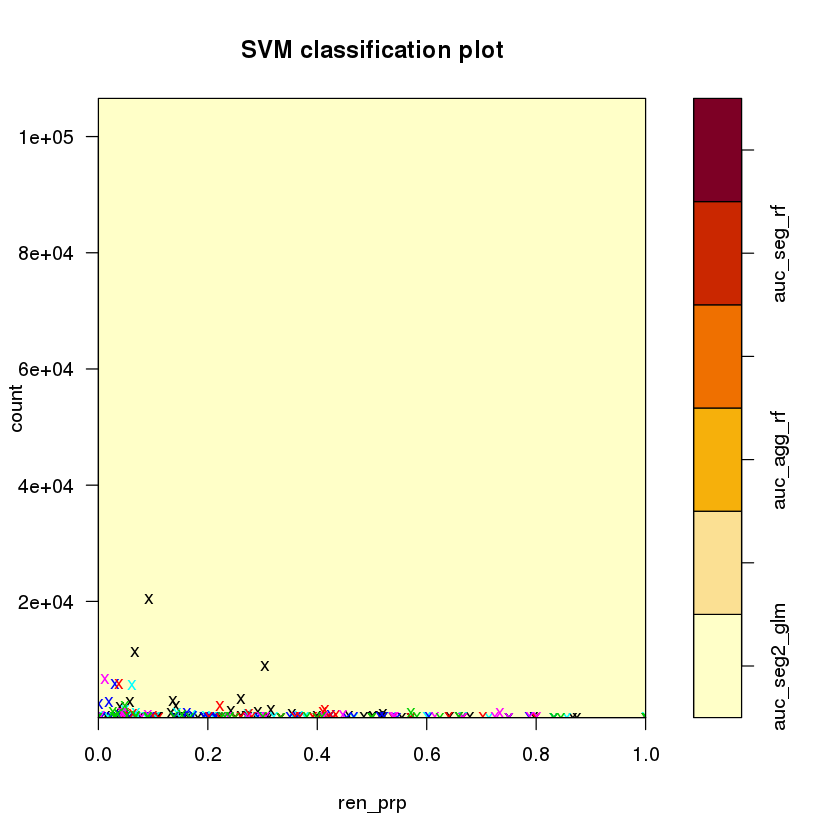

In [99]:
# The svm() algorithm also has a special plot() function that we can use to visualize the support vectors 
# (shown with “x”), the decision boundary, and the margin for the model. The plot helps to visualize a two-dimensional 
# projection of the data (using the Petal.Width and Petal.Length predictors) with Species classes 
# (shown in different shadings) and support vectors. We can also use the slice argument to specify a list of named 
# values for the dimensions held constant (useful when more than two variables are used).
plot(svm_auc_01, train_auc, count ~ ren_prp)
     #,
     #     slice=list(Sepal.Width=3, Sepal.Length=4))

In [108]:
prediction <- predict(svm_auc_01, test,na.action = na.exclude)
xtab <- table(test$auc_win, prediction)
xtab

              prediction
               auc_seg2_glm auc_agg_glm auc_agg_rf auc_seg_glm auc_seg_rf
  auc_agg_glm            15           0          0           0          0
  auc_agg_rf             10           0          0           0          0
  auc_seg_glm            15           0          0           0          0
  auc_seg_rf              7           0          0           0          0
  auc_seg2_glm           30           0          0           0          0
  auc_seg2_rf             7           0          0           0          0
              prediction
               auc_seg2_rf
  auc_agg_glm            0
  auc_agg_rf             0
  auc_seg_glm            0
  auc_seg_rf             0
  auc_seg2_glm           0
  auc_seg2_rf            0

In [109]:
# Finally, we can check the accuracy of the algorithm with the following R code. 
# The metric shows how well the trained algorithm makes predictions using the test set. 
# The 8.7% accuracy is bad
(30)/nrow(test)  # Compute prediction accuracy

[1] 0.08695652

## Hyperparam tuning

In [110]:
obj <- tune.svm(auc_win~., data=train_auc, 
                gamma = 2^(-1:1), cost = 2^(2:4))

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘pdcnt_min’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘pdcnt_min’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘pdcnt_min’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘pdcnt_min’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘pdcnt_min’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘pdcnt_min’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘pdcnt_min’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = sca

In [112]:
summary(obj)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.5    4

- best performance: 0.7053999 

- Detailed performance results:
  gamma cost     error dispersion
1   0.5    4 0.7053999  0.0858582
2   1.0    4 0.7053999  0.0858582
3   2.0    4 0.7053999  0.0858582
4   0.5    8 0.7053999  0.0858582
5   1.0    8 0.7053999  0.0858582
6   2.0    8 0.7053999  0.0858582
7   0.5   16 0.7053999  0.0858582
8   1.0   16 0.7053999  0.0858582
9   2.0   16 0.7053999  0.0858582


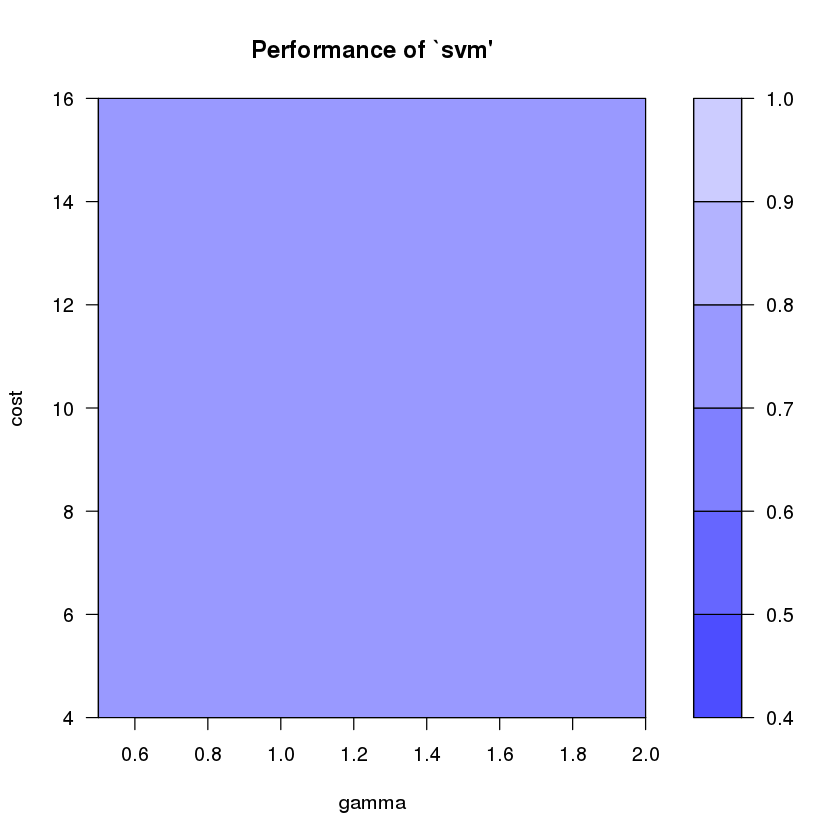

In [113]:
plot(obj)

In [ ]:
suppressWarnings(obj <- tune.svm(auc_win~., data=train_auc, 
                gamma = 2^(-1:1), cost = 2^(2:4),
               kernel='linear'))
summary(obj)
plot(obj)

In [ ]:
suppressWarnings(obj <- tune.svm(auc_win~., data=train_auc, 
                gamma = 2^(-1:1), cost = 2^(2:4),
               kernel='polynomial'))
summary(obj)
plot(obj)

In [ ]:
suppressWarnings(obj <- tune.svm(auc_win~., data=train_auc, 
                gamma = 2^(-1:1), cost = 2^(2:4),
               kernel='sigmoid'))
summary(obj)
plot(obj)

For every one 1 unit change in **count**, the log odds of ***agg_rf_auc*** (versus seg2_glm_auc) **+2.569449e-04**. Which corresponds with a probability of 0.5000642.

In [122]:
zvalues <- summary(model)$coefficients / summary(model)$standard.errors
zvalues

Warning message in sqrt(diag(vc)):
“NaNs produced”
Warning message in sqrt(diag(vc)):
“NaNs produced”


,(Intercept),count,ren_prp,tld_rat,country_majArgentina,country_majAustralia,country_majAustria,country_majBelgium,country_majBrazil,country_majBulgaria,country_majCanada,country_majCayman Islands,country_majChina,country_majCyprus,country_majCzech Republic,country_majDenmark,country_majFinland,country_majFrance,country_majGermany,country_majGibraltor,country_majGreece,country_majIndia,country_majIndonesia,country_majIreland,country_majIsrael,⋯,sldlen_rng,sldlen_std,sldlen_skew,sldlen_kurt,gibbs_min,gibbs_max,gibbs_mean,gibbs_rng,gibbs_std,gibbs_skew,gibbs_kurt,pdcnt_min,pdcnt_max,pdcnt_mean,pdcnt_rng,pdcnt_std,pdcnt_skew,pdcnt_kurt,rarpt_min,rarpt_max,rarpt_mean,rarpt_rng,rarpt_std,rarpt_skew,rarpt_kurt
auc_agg_glm,-14.0344398,0.5556979,171.036690,750.6218,302.2121,-1238.2200,NaN,0,-10128.73411,-1555.7147,-345.17249,118.1156,5.395333,NaN,0,-832.1807,0,-241.28837,-368.89252,0,567.6983,-141.27875,193.0694,NaN,0,⋯,5.326676,5.986879,-24.306082,1.2025136,17.229704,8.6194675,0.6172866,-7.180597,-0.1256947,-1.7352173,1.4578989,-14.0344398,-5.5167003,-0.40757663,2.938514,1.8040017,39.562785,-12.135812,-3.2346382,-2.9794252,3.0087399,3.0353503,-1.290832,0.05910606,-0.2391046
auc_agg_rf,-14.9604421,1.7746411,-111.363588,-357.2312,-945.0288,-2496.9936,0,0,530.15442,268.7836,317.09217,-911.4138,6.665030,0,0,283.9156,NaN,68.44788,20.44115,NaN,-1764.0369,-2207.84747,480.4947,NaN,0,⋯,2.845279,-11.815859,10.620117,0.8247482,-4.118569,-0.7171507,0.8870502,6.555531,-2.2053025,-7.4205360,-0.3360685,-14.9604421,-5.4948820,-0.41288177,5.564792,0.2231437,17.340447,-5.248935,-1.6992849,-1.3802663,3.7788611,1.7748104,-2.169016,0.02935485,-0.2350903
auc_seg_glm,15.9347772,0.6821974,2.015584,-776.5102,-1459.0015,-136.3286,NaN,NaN,234.72050,-2582.8986,523.84191,125.2509,7.998583,NaN,NaN,-339.3153,NaN,-7909.42038,112.11421,NaN,-2700.2861,-56.14345,385.7205,NaN,NaN,⋯,-4.607343,7.528889,-43.227368,2.6353830,-42.304725,-25.5080278,0.5500789,27.684343,-1.5878841,-3.0299457,2.0732249,15.9347772,5.0449312,0.77610854,-7.331922,2.3464223,-5.309553,2.520850,-0.3590117,-0.5824874,-0.8116529,0.1074591,0.769873,-0.71475733,1.3054815
auc_seg_rf,0.5933533,0.3047890,-245.823904,-169.3603,571.7342,-610.0845,NaN,NaN,97.09489,-1320.7436,-5069.99327,-815.4397,32.765241,NaN,NaN,-1458.6115,NaN,65.11644,30.76065,NaN,-1013.1281,-497.28552,-3958.1284,NaN,NaN,⋯,3.484192,2.986880,7.158755,-1.3330794,18.641414,15.2440877,1.4758663,-10.502113,-0.2328854,-0.7557068,0.5665121,0.5933533,-0.4874621,0.04298002,-1.031139,0.7517096,17.077138,-5.612287,-0.5037651,-0.1105884,3.9438932,0.8360562,-2.467881,0.73406599,-1.4071583
auc_seg2_rf,-69.9072980,0.7722548,152.057985,-341.2510,-789.1140,309.5830,NaN,NaN,-3360.93545,-781.5314,15.68304,332.9773,-46.607224,NaN,NaN,-266.4975,NaN,-72.15288,61.59745,NaN,-1650.6219,-71.19185,-5189.6485,NaN,NaN,⋯,7.554811,-8.401848,-2.999097,0.9577930,50.940856,39.2496757,-3.5675343,-43.662392,4.7032655,-2.3791202,2.3169259,-69.9072980,-28.7057730,-0.23497822,26.696008,0.8131372,43.075156,-10.260379,0.1878028,0.5997196,-0.7687004,0.2362755,-1.346250,-2.50849041,1.7979530


In [123]:
# Then you can calculate the p-values, if you want, using the same kind of code that we used when looking at ordinal logistic regression, 
# except this time, we use the pnorm() function instead of the pt() function because the z-value is related to a normal distribution, 
# not a t distribution. Remember that the normal distribution doesn’t depend on degrees of freedom.
options(scipen=999)
pnorm(abs(zvalues), lower.tail=FALSE)*2
pnorm(abs(zvalues), lower.tail=FALSE)*2<0.05

,(Intercept),count,ren_prp,tld_rat,country_majArgentina,country_majAustralia,country_majAustria,country_majBelgium,country_majBrazil,country_majBulgaria,country_majCanada,country_majCayman Islands,country_majChina,country_majCyprus,country_majCzech Republic,country_majDenmark,country_majFinland,country_majFrance,country_majGermany,country_majGibraltor,country_majGreece,country_majIndia,country_majIndonesia,country_majIreland,country_majIsrael,⋯,sldlen_rng,sldlen_std,sldlen_skew,sldlen_kurt,gibbs_min,gibbs_max,gibbs_mean,gibbs_rng,gibbs_std,gibbs_skew,gibbs_kurt,pdcnt_min,pdcnt_max,pdcnt_mean,pdcnt_rng,pdcnt_std,pdcnt_skew,pdcnt_kurt,rarpt_min,rarpt_max,rarpt_mean,rarpt_rng,rarpt_std,rarpt_skew,rarpt_kurt
auc_agg_glm,0.000000000000000000000000000000000000000000009595162233099329304,0.57841743,0.00000000,0,0,0,NaN,1,0,0,0.0000000000000000000000000000000000000000000000000000000000000,0,0.0000000683967039483940927392633421337542198870096399332396686077117919921875000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,NaN,1,0,1,0,0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,1,0,0,0,NaN,1,⋯,0.000000100026164790,0.00000000213906277173523631557385603721,0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001690544,0.22916459,0.00000000000000000000000000000000000000000000000000000000000000000158961548019111513,0.00000000000000000672661950375640830564756898598880790582627447991305967567310375443412340246140956878662109375000000000000000000000000000000000000000,0.5370456711,0.000000000000694078152210862683083948480095312454345862773763542463711928576231002807617187500000000000000000000000000000000000000000000000000000000000000000000000000000000000,0.899973611565,0.0827023229198310533,0.14486842,0.000000000000000000000000000000000000000000009595161187364424960,0.0000000345423833477068715252697971018758238415102823637425899505615234375000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,0.6835845,0.0032978938387604591828128342001491546398028731346130371093750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,0.07123104,0.0000000000000000000000000000000000000000000000000000000000000000000000000,0.0000000000000000000000000000000006822993,0.00121797,0.002887897,0.00262333617,0.002402565,0.19676182,0.95286763,0.81102444
auc_agg_rf,0.000000000000000000000000000000000000000000000000013313857667255,0.07595717,0.00000000,0,0,0,1,1,0,0,0.0000000000000000000000000000000000000000000000000000000000000,0,0.0000000000264611079414702166697815567300539714087892484428721218137070536613464355468750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,1,1,0,NaN,0,0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000072016758989268451309347230813542516803124023511079144805972516987585045308874289553088571596630575713340709131176476113684,NaN,0,0,0,NaN,1,⋯,0.004437255111128280,0.00000000000000000000000000000003232296,0.0000000000000000000000000240259995153582243381419120908470017429024191508907178360051204977116149838489711498823453439399600028991699219,0.40951458,0.00003812318719585507017502332138825238416757201775908470153808593750000000000000000,0.47328113818433303894295249847345985472202301025390625000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,0.3750518995,0.0000000000554443808285121015926260735053130584981673223410325590521097183227539062500000000000000000000000000000000000000000000000000000000000000000

,(Intercept),count,ren_prp,tld_rat,country_majArgentina,country_majAustralia,country_majAustria,country_majBelgium,country_majBrazil,country_majBulgaria,country_majCanada,country_majCayman Islands,country_majChina,country_majCyprus,country_majCzech Republic,country_majDenmark,country_majFinland,country_majFrance,country_majGermany,country_majGibraltor,country_majGreece,country_majIndia,country_majIndonesia,country_majIreland,country_majIsrael,⋯,sldlen_rng,sldlen_std,sldlen_skew,sldlen_kurt,gibbs_min,gibbs_max,gibbs_mean,gibbs_rng,gibbs_std,gibbs_skew,gibbs_kurt,pdcnt_min,pdcnt_max,pdcnt_mean,pdcnt_rng,pdcnt_std,pdcnt_skew,pdcnt_kurt,rarpt_min,rarpt_max,rarpt_mean,rarpt_rng,rarpt_std,rarpt_skew,rarpt_kurt
auc_agg_glm,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,NA,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,NA,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,NA,FALSE,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
auc_agg_rf,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,NA,TRUE,TRUE,NA,TRUE,TRUE,TRUE,NA,FALSE,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
auc_seg_glm,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,NA,NA,TRUE,TRUE,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,TRUE,TRUE,NA,TRUE,TRUE,TRUE,NA,NA,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
auc_seg_rf,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,NA,NA,TRUE,TRUE,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,TRUE,TRUE,NA,TRUE,TRUE,TRUE,NA,NA,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
auc_seg2_rf,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,NA,NA,TRUE,TRUE,TRUE,TRUE,TRUE,NA,NA,TRUE,NA,TRUE,TRUE,NA,TRUE,TRUE,TRUE,NA,NA,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE


In [125]:
train %>% group_by(country_maj) %>%  tally() %>% arrange(desc(n)) %>% head(5)

country_maj,n
<fct>,<int>
United States,204
Germany,71
China,63
Netherlands,50
United Kingdom,40


In [126]:
# daydom_min
train %>% summary()

         auc_win            l10_win        count             ren_prp      
 auc_agg_glm :122   l10_agg_glm : 84   Min.   :    1.00   Min.   :0.0000  
 auc_agg_rf  : 73   l10_agg_rf  : 32   1st Qu.:   15.25   1st Qu.:0.1157  
 auc_seg_glm :143   l10_seg_glm :125   Median :   72.50   Median :0.3207  
 auc_seg_rf  : 94   l10_seg_rf  : 48   Mean   :  956.02   Mean   :0.3689  
 auc_seg2_glm:342   l10_seg2_glm:475   3rd Qu.:  316.75   3rd Qu.:0.5455  
 auc_seg2_rf : 72   l10_seg2_rf : 82   Max.   :72690.00   Max.   :1.0000  
                                                                          
    tld_rat                  country_maj      region_maj   country_cnt   
 Min.   :0.0000138   United States :204   China    : 61   Min.   :1.000  
 1st Qu.:0.0031571   Germany       : 71   Non China:785   1st Qu.:1.000  
 Median :0.0137938   China         : 63                   Median :1.000  
 Mean   :0.0798244   Netherlands   : 50                   Mean   :1.014  
 3rd Qu.:0.0656250   United Ki

In [127]:
sig_df <- pnorm(abs(zvalues), lower.tail=FALSE)*2<0.01
sig_df <- sig_df * (exp(coefs))#/(1+exp(coefs)) 
sig_df %>% round(4) %>% t()

,auc_agg_glm,auc_agg_rf,auc_seg_glm,auc_seg_rf,auc_seg2_rf
(Intercept),0.8424,0.8440,1.1983,0.0000,0.4217
count,0.0000,0.0000,0.0000,0.0000,0.0000
ren_prp,3.1588,0.4852,0.0000,0.1330,3.5195
tld_rat,1.2812,0.7714,0.5393,0.9081,0.7710
country_majArgentina,2.6933,0.5579,0.5374,6.0337,0.8331
country_majAustralia,0.2224,0.2522,0.5218,0.3427,3.7847
country_majAustria,NA,0.0000,NA,NA,NA
country_majBelgium,0.0000,0.0000,NA,NA,NA
country_majBrazil,0.0514,4.6305,1.3231,1.1928,0.1375
country_majBulgaria,0.2050,3.7824,0.1565,0.3828,0.5992


In [128]:
# performance on test
predicted <- predict(model,newdata = test,type = "probs",na.action =na.pass)
predicted_class <- predict(model,newdata = test,na.action =na.pass)
dim(predicted)
head(predicted)
dim(predicted_class)
head(predicted_class)

caret::confusionMatrix(as.factor(predicted_class),as.factor(test$auc_win))

[1] 212   6

,auc_seg2_glm,auc_agg_glm,auc_agg_rf,auc_seg_glm,auc_seg_rf,auc_seg2_rf
1,0.0000000000000013562,0.9997106667070,0.000000001006089,0.00000181135296,0.0000000003239929,0.0002875206
3,0.0151336843275596978,0.2447459276472,0.575409135843454,0.00059492441137,0.0032138871706773,0.1609024406
7,NA,NA,NA,NA,NA,NA
12,0.0086018485725917158,0.0000002968495,0.990320816921220,0.00000002669735,0.0001551348354407,0.0009218761
14,0.1255969474256937723,0.1304712275221,0.132217959311255,0.00835183592946,0.0040500979553619,0.5993119319
15,0.4221132259219042560,0.0275833345691,0.396004678321111,0.05097373647156,0.0843732136042814,0.0189518111


NULL

[1] auc_agg_glm  auc_agg_rf   <NA>         auc_agg_rf   auc_seg2_rf 
[6] auc_seg2_glm
6 Levels: auc_seg2_glm auc_agg_glm auc_agg_rf auc_seg_glm ... auc_seg2_rf

Warning message in confusionMatrix.default(as.factor(predicted_class), as.factor(test$auc_win)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

              Reference
Prediction     auc_agg_glm auc_agg_rf auc_seg_glm auc_seg_rf auc_seg2_glm
  auc_agg_glm            5          1           4          3            5
  auc_agg_rf             0          1           1          2            3
  auc_seg_glm            3          2           2          5            2
  auc_seg_rf             0          2           2          1            2
  auc_seg2_glm           1          3           2          4           14
  auc_seg2_rf            0          2           1          1            2
              Reference
Prediction     auc_seg2_rf
  auc_agg_glm            2
  auc_agg_rf             2
  auc_seg_glm            3
  auc_seg_rf             1
  auc_seg2_glm           1
  auc_seg2_rf            0

Overall Statistics
                                          
               Accuracy : 0.2706          
                 95% CI : (0.1799, 0.3779)
    No Information Rate : 0.3294          
    P-Value [Acc > N

# ***BINARY: agg_rf over seg2_glm***

In [165]:
names(metrics_df)

[1] "l10_seg2_glm"    "l10_seg_glm"     "l10_agg_glm"     "l10_seg2_rf"    
 [5] "l10_seg_rf"      "l10_agg_rf"      "auc_seg2_glm"    "auc_seg_glm"    
 [9] "auc_agg_glm"     "auc_seg2_rf"     "auc_seg_rf"      "auc_agg_rf"     
[13] "tld_reseller"    "count"           "ren_prp"         "tld_rat"        
[17] "country_maj"     "region_maj"      "country_cnt"     "region_cnt"     
[21] "daydom_min"      "daydom_max"      "daydom_mean"     "daydom_rng"     
[25] "daydom_std"      "daydom_skew"     "daydom_kurt"     "sldlen_min"     
[29] "sldlen_max"      "sldlen_mean"     "sldlen_rng"      "sldlen_std"     
[33] "sldlen_skew"     "sldlen_kurt"     "gibbs_min"       "gibbs_max"      
[37] "gibbs_mean"      "gibbs_rng"       "gibbs_std"       "gibbs_skew"     
[41] "gibbs_kurt"      "pdcnt_min"       "pdcnt_max"       "pdcnt_mean"     
[45] "pdcnt_rng"       "pdcnt_std"       "pdcnt_skew"      "pdcnt_kurt"     
[49] "rarpt_min"       "rarpt_max"       "rarpt_mean"      "rarpt_rng"      
[53] "rarpt_std"       "rarpt_skew"      "rarpt_kurt"      "auc_win"        
[57] "l10_win"         "l10_win_aggseg2" "auc_win_aggseg2"

In [166]:
metrics_df = metrics_df %>% 
    mutate( l10_win_aggseg2 = (l10_agg_rf/l10_seg2_glm)>1,
            auc_win_aggseg2 = (auc_agg_rf/auc_seg2_glm)>1
          )

In [167]:
set.seed(123) 
smp_siz = floor(0.8*nrow(metrics_df_sub))
train_ind = sample(seq_len(nrow(metrics_df_sub)),size = smp_siz) 
train = metrics_df[train_ind,] 
test = metrics_df[-train_ind,]  

## Decision Tree

### agg_rf over seg2_glm

In [168]:
library(rpart)

In [169]:
names(train)

[1] "l10_seg2_glm"    "l10_seg_glm"     "l10_agg_glm"     "l10_seg2_rf"    
 [5] "l10_seg_rf"      "l10_agg_rf"      "auc_seg2_glm"    "auc_seg_glm"    
 [9] "auc_agg_glm"     "auc_seg2_rf"     "auc_seg_rf"      "auc_agg_rf"     
[13] "tld_reseller"    "count"           "ren_prp"         "tld_rat"        
[17] "country_maj"     "region_maj"      "country_cnt"     "region_cnt"     
[21] "daydom_min"      "daydom_max"      "daydom_mean"     "daydom_rng"     
[25] "daydom_std"      "daydom_skew"     "daydom_kurt"     "sldlen_min"     
[29] "sldlen_max"      "sldlen_mean"     "sldlen_rng"      "sldlen_std"     
[33] "sldlen_skew"     "sldlen_kurt"     "gibbs_min"       "gibbs_max"      
[37] "gibbs_mean"      "gibbs_rng"       "gibbs_std"       "gibbs_skew"     
[41] "gibbs_kurt"      "pdcnt_min"       "pdcnt_max"       "pdcnt_mean"     
[45] "pdcnt_rng"       "pdcnt_std"       "pdcnt_skew"      "pdcnt_kurt"     
[49] "rarpt_min"       "rarpt_max"       "rarpt_mean"      "rarpt_rng"      
[53] "rarpt_std"       "rarpt_skew"      "rarpt_kurt"      "auc_win"        
[57] "l10_win"         "l10_win_aggseg2" "auc_win_aggseg2"

In [170]:
fit <- rpart(auc_win_aggseg2 ~ .,
             method="class", 
             data=subset(train, select = -c(tld_reseller,
                                            l10_seg2_glm,l10_seg_glm,l10_agg_glm,l10_seg2_rf,l10_seg_rf,l10_agg_rf,
                                            auc_seg2_glm,auc_seg_glm,auc_agg_glm,auc_seg2_rf,auc_seg_rf,auc_agg_rf,
                                            auc_win,l10_win,l10_win_aggseg2)))

In [171]:
summary(fit)

Call:
rpart(formula = auc_win_aggseg2 ~ ., data = subset(train, select = -c(tld_reseller, 
    l10_seg2_glm, l10_seg_glm, l10_agg_glm, l10_seg2_rf, l10_seg_rf, 
    l10_agg_rf, auc_seg2_glm, auc_seg_glm, auc_agg_glm, auc_seg2_rf, 
    auc_seg_rf, auc_agg_rf, auc_win, l10_win, l10_win_aggseg2)), 
    method = "class")
  n= 846 

          CP nsplit rel error   xerror       xstd
1 0.05214724      0 1.0000000 1.000000 0.04342179
2 0.04141104      2 0.8957055 1.092025 0.04404740
3 0.01840491      6 0.7269939 1.058282 0.04384556
4 0.01687117      8 0.6901840 1.058282 0.04384556
5 0.01380368     11 0.6380368 1.061350 0.04386522
6 0.01226994     13 0.6104294 1.052147 0.04380546
7 0.01000000     17 0.5613497 1.042945 0.04374334

Variable importance
      count     tld_rat   gibbs_rng  daydom_rng  daydom_max daydom_mean 
         13          12          10           7           7           7 
country_maj sldlen_kurt sldlen_skew  gibbs_kurt   gibbs_max  gibbs_mean 
          7           4       

In [172]:
levels(train$country_maj)

[1] ""               "Argentina"      "Australia"      "Austria"       
 [5] "Belgium"        "Brazil"         "Bulgaria"       "Canada"        
 [9] "Cayman Islands" "China"          "Cyprus"         "Czech Republic"
[13] "Denmark"        "Finland"        "France"         "Germany"       
[17] "Gibraltor"      "Greece"         "India"          "Indonesia"     
[21] "Ireland"        "Israel"         "Italy"          "Japan"         
[25] "Korea"          "Lithuania"      "Luxembourg"     "Mexico"        
[29] "Netherlands"    "New Zealand"    "Nigeria"        "Norway"        
[33] "Poland"         "Portugal"       "Russia"         "Singapore"     
[37] "Slovakia"       "South Africa"   "Southafrica"    "Spain"         
[41] "Sweden"         "Switzerland"    "Turkey"         "Ukraine"       
[45] "United Kingdom" "United States"  "USA"            "Vietnam"

In [173]:
names(fit)

[1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "csplit"             
[13] "variable.importance" "y"                   "ordered"

In [174]:
fit

n= 846 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 846 326 FALSE (0.61465721 0.38534279)  
    2) count< 16.5 221  24 FALSE (0.89140271 0.10859729) *
    3) count>=16.5 625 302 FALSE (0.51680000 0.48320000)  
      6) country_maj=Cyprus,Greece,India,Lithuania,Luxembourg,Nigeria,Norway,Portugal,Russia,Slovakia,Spain,Sweden,Switzerland,Turkey,Ukraine,Vietnam 133  39 FALSE (0.70676692 0.29323308)  
       12) daydom_skew< 1.668298 109  24 FALSE (0.77981651 0.22018349) *
       13) daydom_skew>=1.668298 24   9 TRUE (0.37500000 0.62500000)  
         26) gibbs_mean< 5.08551 10   3 FALSE (0.70000000 0.30000000) *
         27) gibbs_mean>=5.08551 14   2 TRUE (0.14285714 0.85714286) *
      7) country_maj=Argentina,Australia,Austria,Brazil,Bulgaria,Canada,Cayman Islands,China,Czech Republic,Denmark,France,Germany,Indonesia,Italy,Japan,Korea,Mexico,Netherlands,New Zealand,Poland,South Africa,Southafrica,United Kingdom,United States 492 229 TRUE (0.46544715 0.

Warning message in plot.window(...):
“"use.n" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"use.n" is not a graphical parameter”
Warning message in title(...):
“"use.n" is not a graphical parameter”


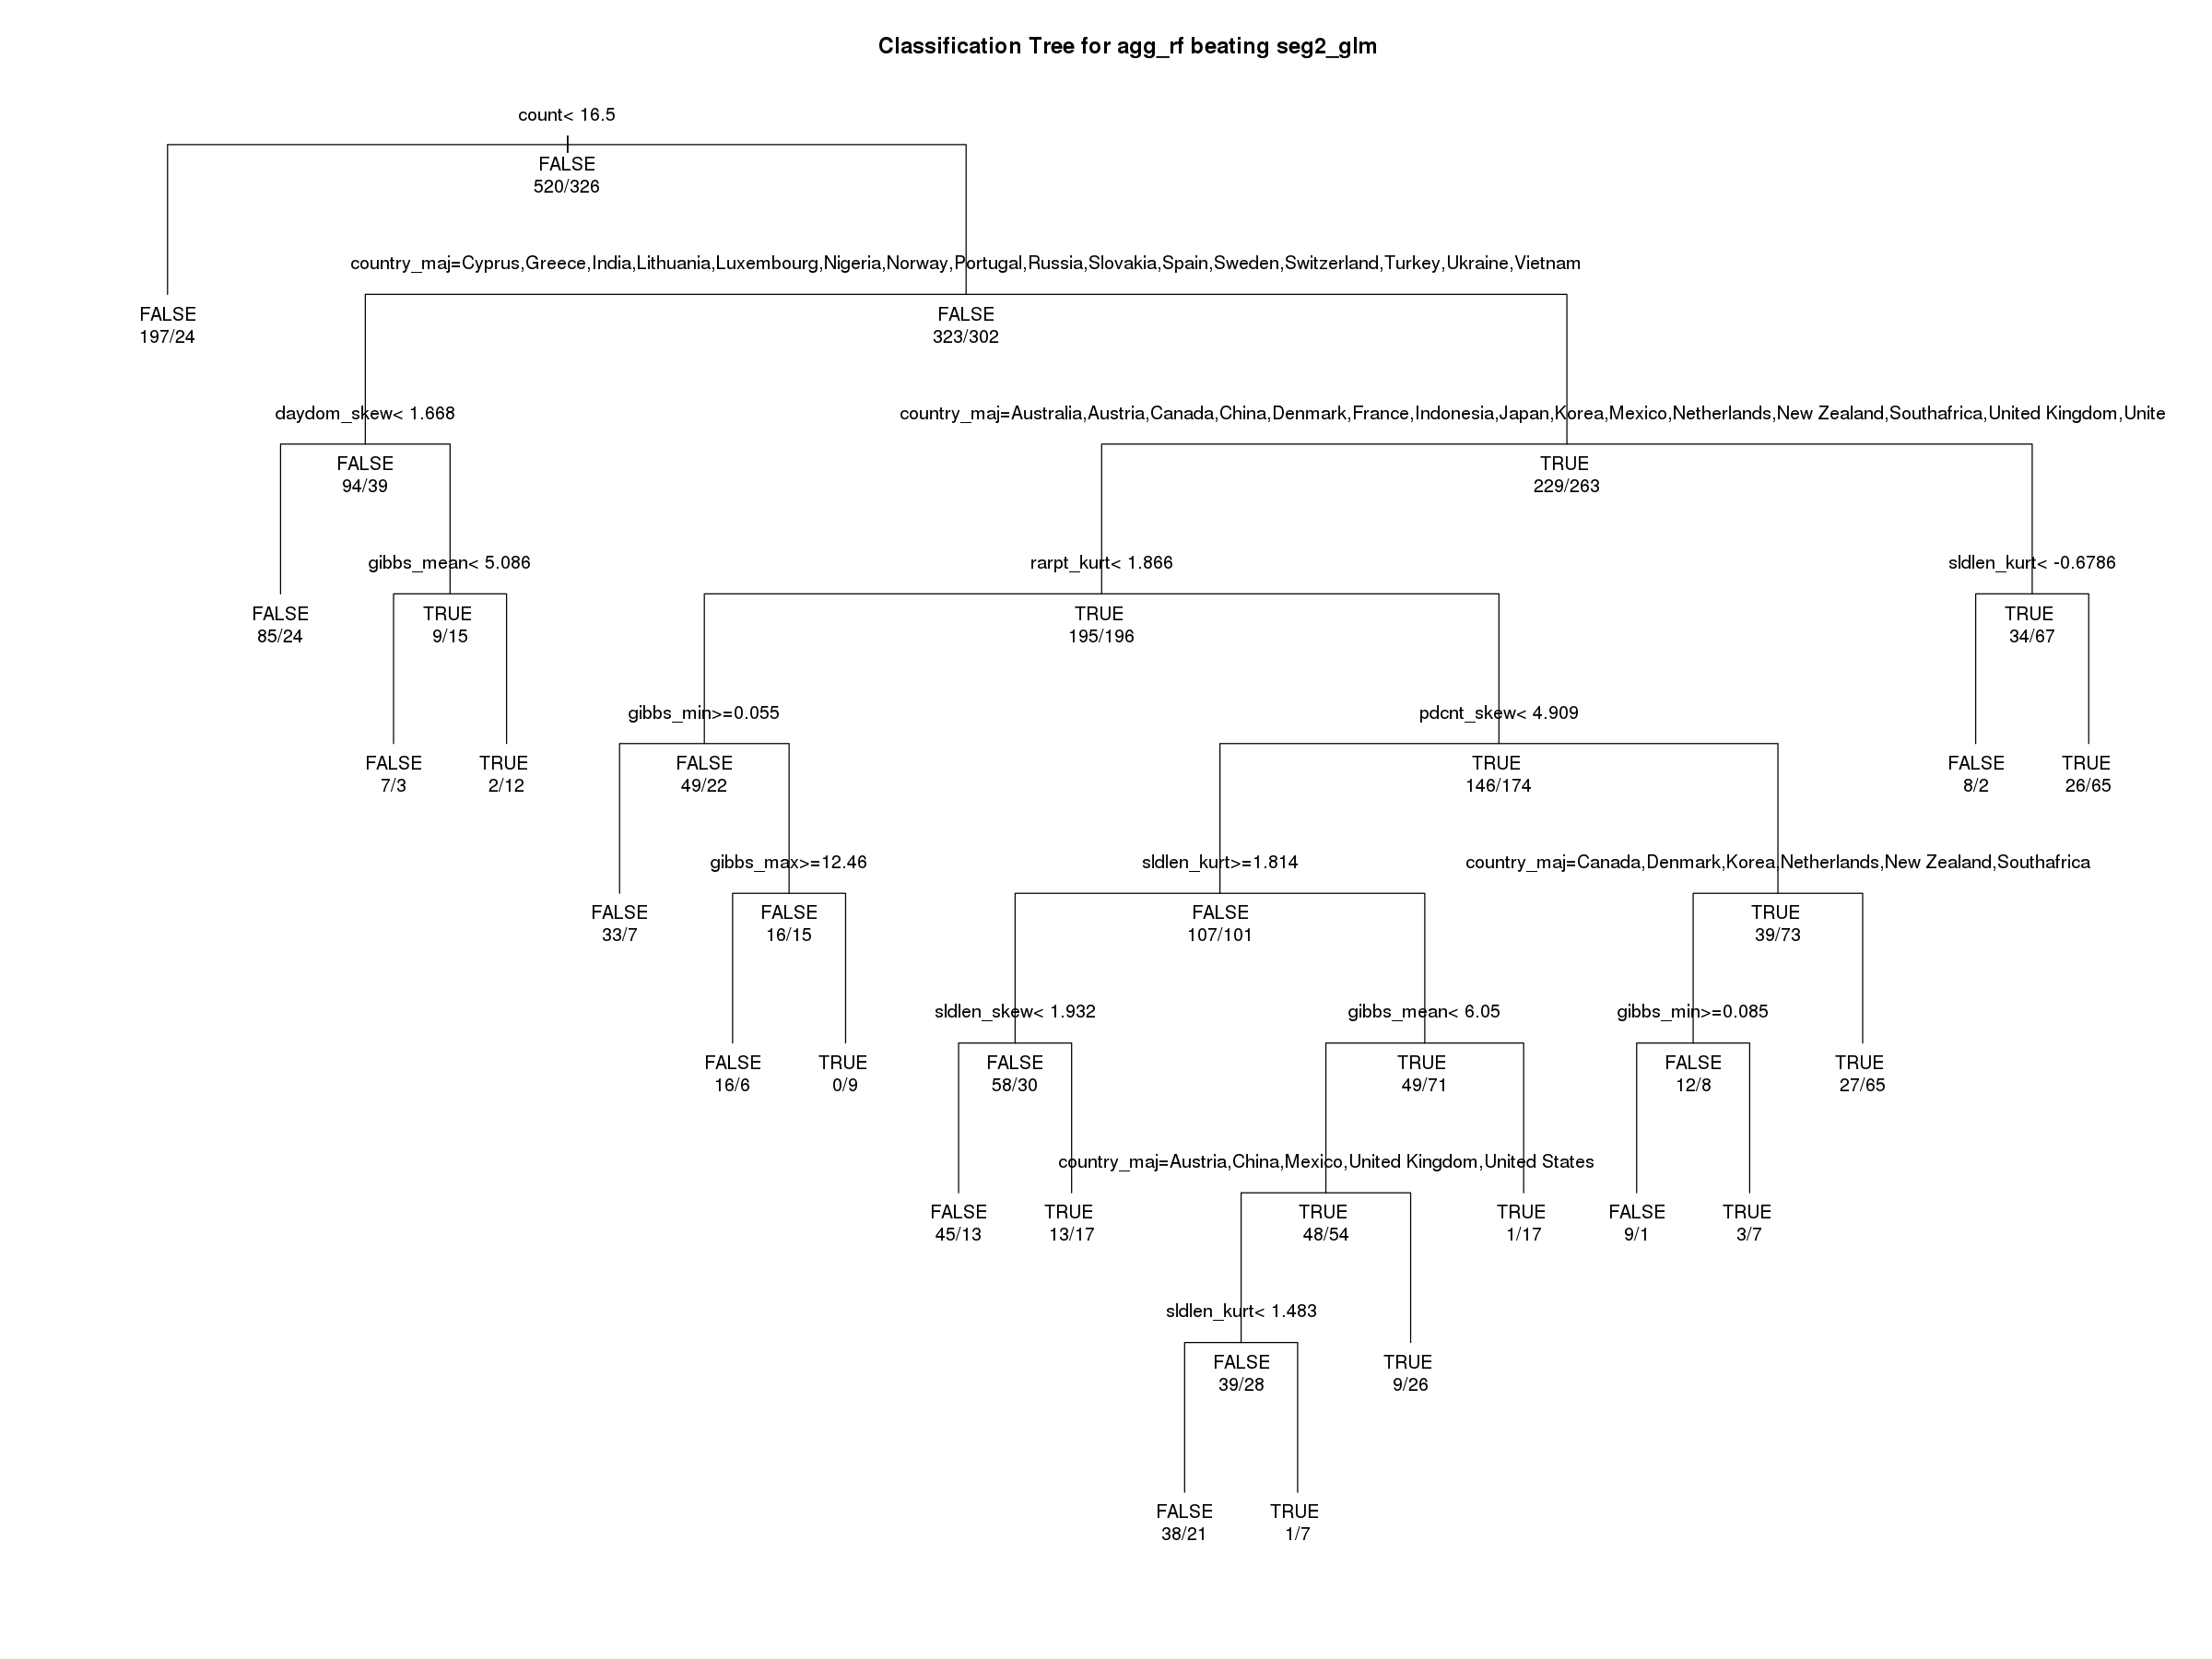

In [176]:
# plot tree
plot(fit, uniform=TRUE,
   main="Classification Tree for agg_rf beating seg2_glm", use.n=TRUE)
text(fit, use.n=TRUE, all=TRUE, cex=1, pretty=1)

Interpretation:
- If count of domains is less than or equal to 16, then seg2_glm wins
- Otherwise, if county_maj is one of Cyprus,Greece,India,Lithuania,Luxembourg,Nigeria,Norway,Portugal,Russia,Slovakia,Spain,Sweden,Switzerland,Turkey,Ukraine,Vietnam AND daydpom_skew is < 1.6568, then seg2_glm wins

In [152]:
library(rpart.plot)

Warning message:
“Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


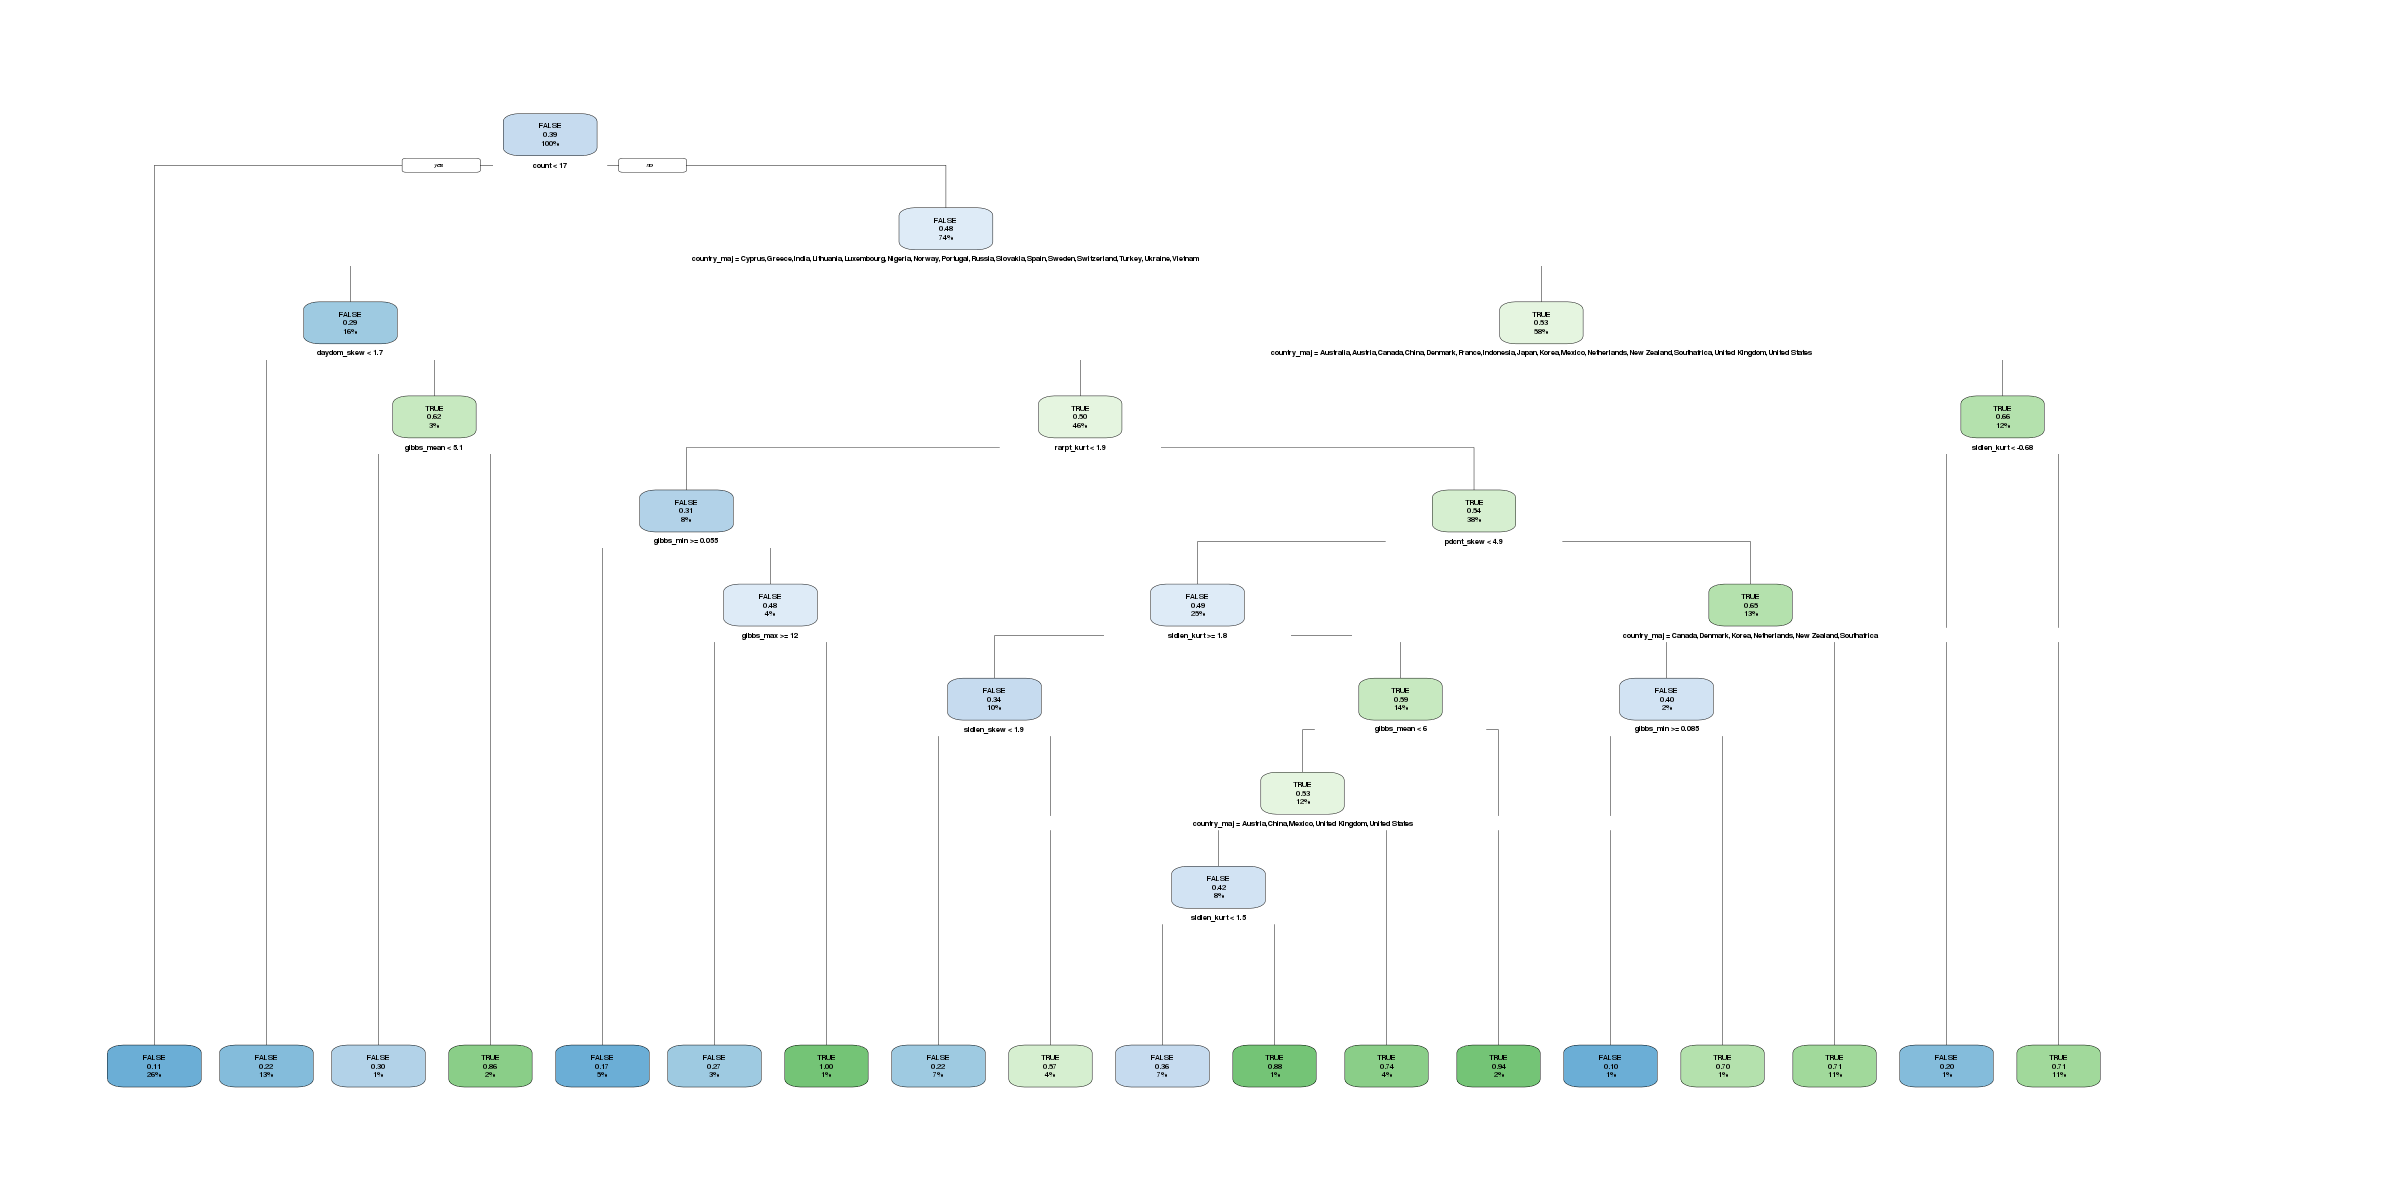

In [179]:
options(repr.plot.width=20, repr.plot.height=10)
rpart.plot(fit)

In [181]:
fit$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.05214724,0,1.0000000,1.000000,0.04342179
2,0.04141104,2,0.8957055,1.092025,0.04404740
3,0.01840491,6,0.7269939,1.058282,0.04384556
4,0.01687117,8,0.6901840,1.058282,0.04384556
5,0.01380368,11,0.6380368,1.061350,0.04386522
6,0.01226994,13,0.6104294,1.052147,0.04380546
7,0.01000000,17,0.5613497,1.042945,0.04374334


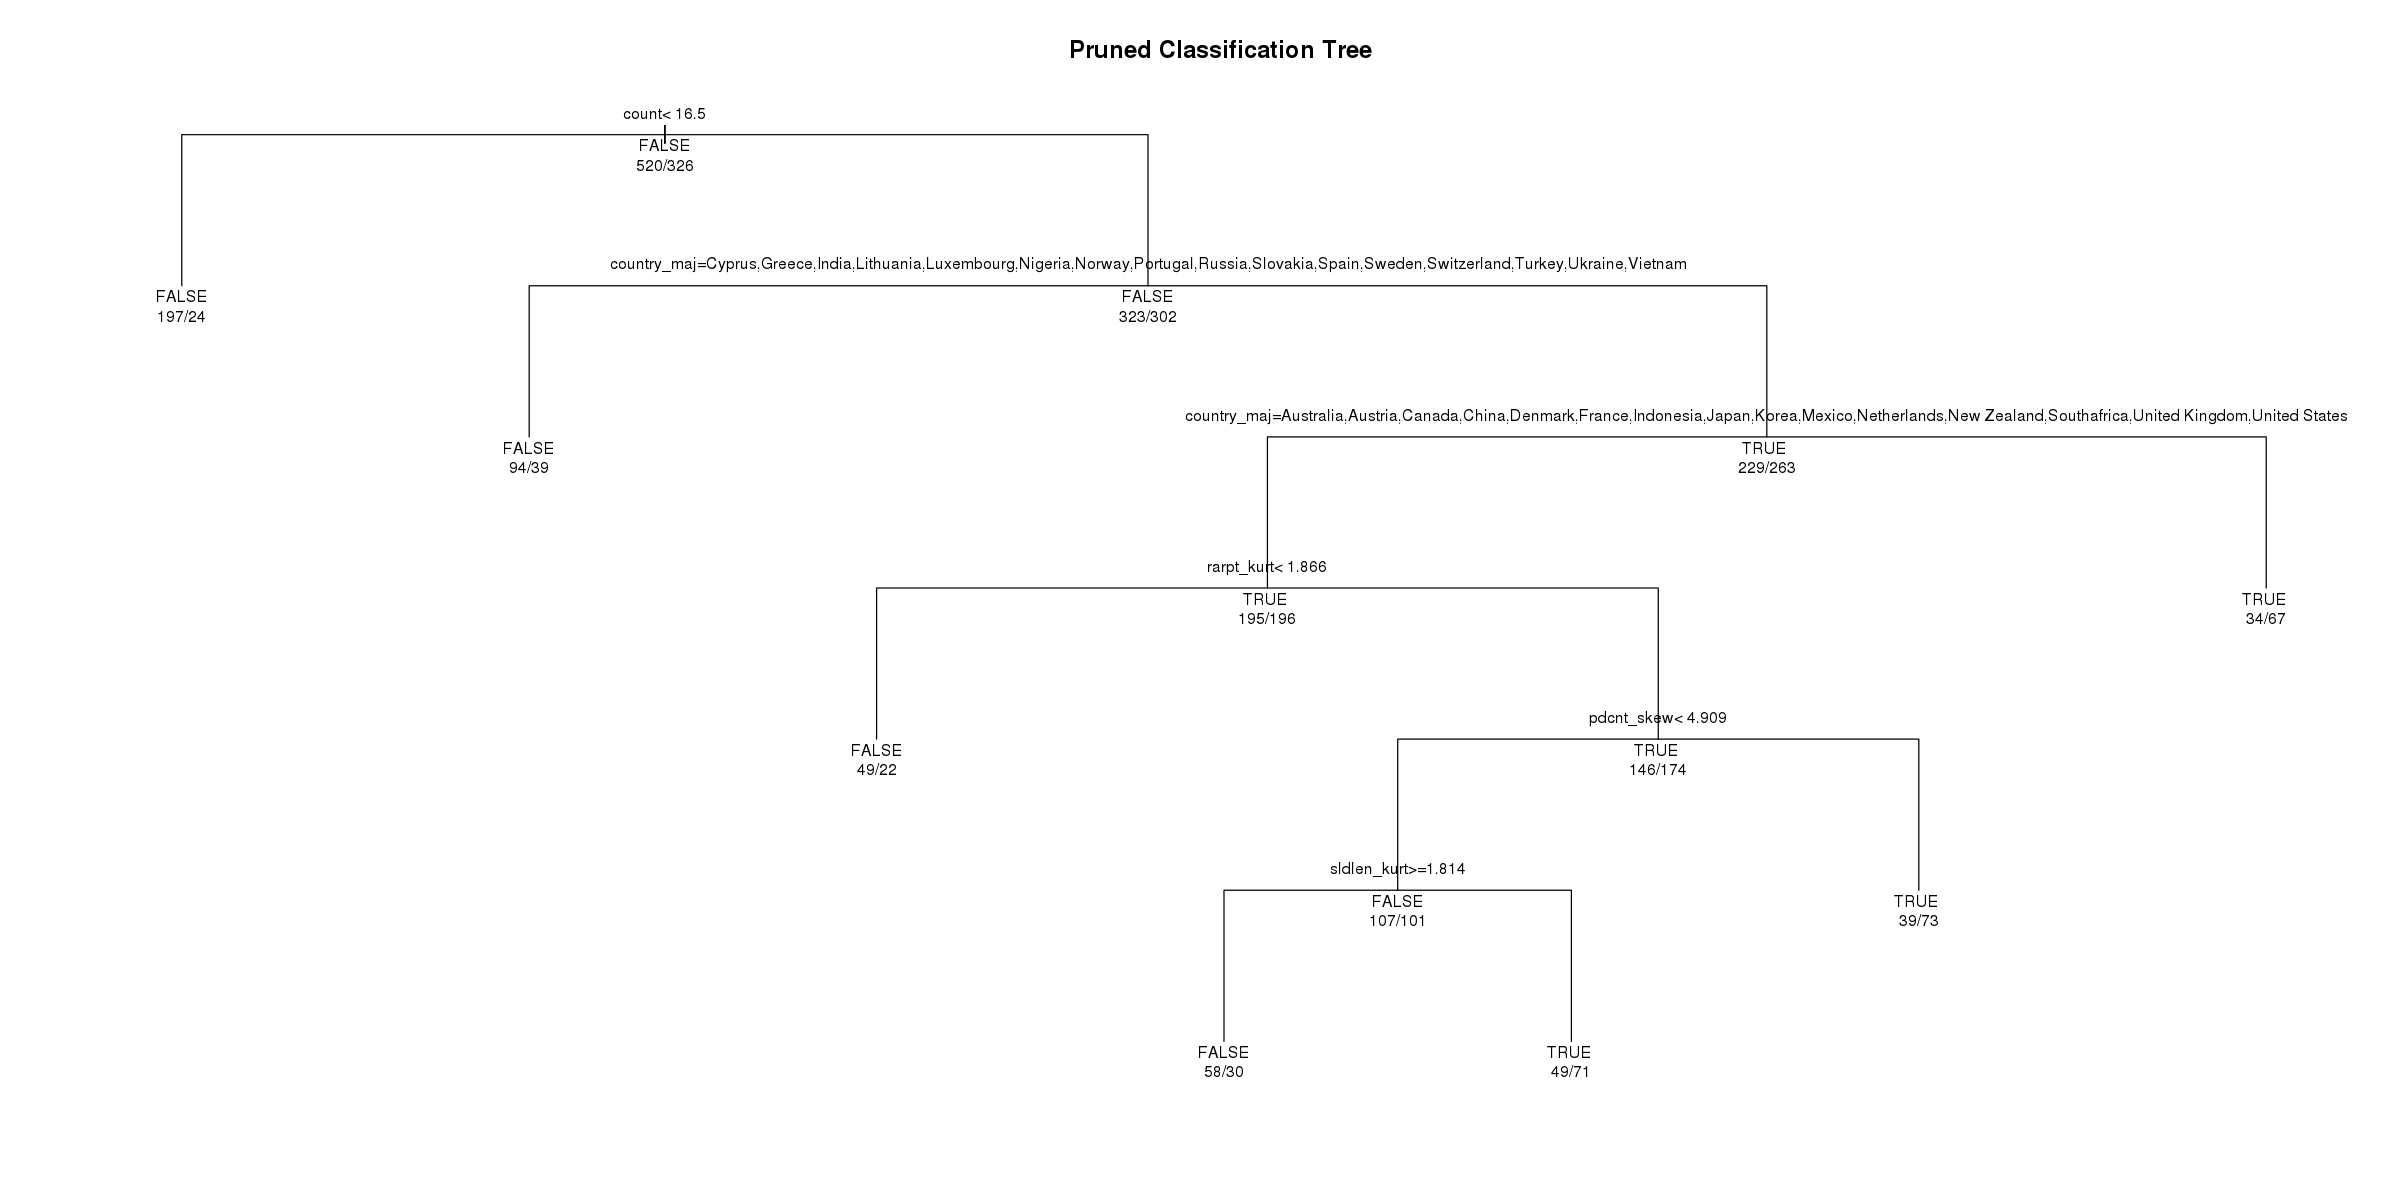

In [183]:
# prune the tree
# pfit<- prune(fit, cp=   fit$cptable[which.min(fit$cptable[,"xerror"]),"CP"])
pfit<- prune(fit, cp= .02)

# plot the pruned tree
plot(pfit, uniform=TRUE,
   main="Pruned Classification Tree ")
text(pfit, use.n=TRUE, all=TRUE, cex=.8, pretty=1)

In [184]:
t = factor(predict(fit,test,type="class"))

In [185]:
p = factor(test[['auc_win_glmagg_glmseg2_rfagg']])

In [186]:
length(t)
length(p)

[1] 212

[1] 0

In [189]:
test[['auc_win_aggseg2']]

[1]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
 [13]  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
 [25] FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [37]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE
 [49] FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
 [61]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
 [73] FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
 [85] FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[109] FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[121] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
[133]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
[145] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE
[157] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [190]:
factor(predict(fit,test,type="class"))

1     3     7    12    14    15    22    27    28    32    35    43    47 
 TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE 
   60    62    63    66    70    73    75    86    97   101   102   109   118 
 TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE 
  126   131   132   133   140   144   147   149   150   154   156   157   174 
FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE 
  176   183   187   192   198   202   208   213   214   216   233   257   269 
FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE 
  272   273   276   283   285   288   290   293   300   305   307   313   314 
 TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE 
  318   321   325   329   350   353   354   355   360   363   366   370   380 
FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE 
  383   385   387   394   400   405   406   408   411   416   434   439   443 
 TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE 
  451   454   460   462   469   471   481   485   492   496   502   506   510 
 TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE 
  514   518   525   529   531   540   550   551   556   561   565   568   571 
FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE 
  572   582   586   592   595   603   604   607   613   620   621   628   631 
FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE 
  632   634   636   641   642   645   647   652   659   661   670   676   681 
FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE 
  689   691   701   705   707   708   715   729   731   746   758   768   773 
FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE 
  782   788   796   798   803   805   811   812   813   821   826   829   834 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  837   838   849   850   852   855   857   863   869   870   874   875   883 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  886   894   897   902   917   939   940   942   951   955   960   966   969 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  974   987   995  1001  1002  1003  1004  1009  1012  1016  1018  1019  1030 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
 1032  1035  1041  1049 
FALSE FALSE FALSE FALSE 
Levels: FALSE TRUE

In [191]:
# pruned test prediction
confusionMatrix(factor(test[['auc_win_aggseg2']]),
                factor(predict(fit,test,type="class")))#, positive='1')

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   104   38
     TRUE     35   35
                                          
               Accuracy : 0.6557          
                 95% CI : (0.5875, 0.7194)
    No Information Rate : 0.6557          
    P-Value [Acc > NIR] : 0.5318          
                                          
                  Kappa : 0.2299          
                                          
 Mcnemar's Test P-Value : 0.8149          
                                          
            Sensitivity : 0.7482          
            Specificity : 0.4795          
         Pos Pred Value : 0.7324          
         Neg Pred Value : 0.5000          
             Prevalence : 0.6557          
         Detection Rate : 0.4906          
   Detection Prevalence : 0.6698          
      Balanced Accuracy : 0.6138          
                                          
       'Positive' Class : FALSE           
                     

In [193]:
# pruned test prediction
confusionMatrix(factor(test[['auc_win_aggseg2']]),
                factor(predict(pfit,test,type="class")))#, positive='1')

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    95   47
     TRUE     30   40
                                          
               Accuracy : 0.6368          
                 95% CI : (0.5681, 0.7016)
    No Information Rate : 0.5896          
    P-Value [Acc > NIR] : 0.09175         
                                          
                  Kappa : 0.2265          
                                          
 Mcnemar's Test P-Value : 0.06825         
                                          
            Sensitivity : 0.7600          
            Specificity : 0.4598          
         Pos Pred Value : 0.6690          
         Neg Pred Value : 0.5714          
             Prevalence : 0.5896          
         Detection Rate : 0.4481          
   Detection Prevalence : 0.6698          
      Balanced Accuracy : 0.6099          
                                          
       'Positive' Class : FALSE           
                     

### seg_rf over seg2_glm

In [194]:
library(rpart)

In [219]:
train$auc_win_segseg2 = (train$auc_seg_rf/train$auc_seg2_glm)>1
test$auc_win_segseg2 = (test$auc_seg_rf/test$auc_seg2_glm)>1

In [199]:
names(train)

[1] "l10_seg2_glm"    "l10_seg_glm"     "l10_agg_glm"     "l10_seg2_rf"    
 [5] "l10_seg_rf"      "l10_agg_rf"      "auc_seg2_glm"    "auc_seg_glm"    
 [9] "auc_agg_glm"     "auc_seg2_rf"     "auc_seg_rf"      "auc_agg_rf"     
[13] "tld_reseller"    "count"           "ren_prp"         "tld_rat"        
[17] "country_maj"     "region_maj"      "country_cnt"     "region_cnt"     
[21] "daydom_min"      "daydom_max"      "daydom_mean"     "daydom_rng"     
[25] "daydom_std"      "daydom_skew"     "daydom_kurt"     "sldlen_min"     
[29] "sldlen_max"      "sldlen_mean"     "sldlen_rng"      "sldlen_std"     
[33] "sldlen_skew"     "sldlen_kurt"     "gibbs_min"       "gibbs_max"      
[37] "gibbs_mean"      "gibbs_rng"       "gibbs_std"       "gibbs_skew"     
[41] "gibbs_kurt"      "pdcnt_min"       "pdcnt_max"       "pdcnt_mean"     
[45] "pdcnt_rng"       "pdcnt_std"       "pdcnt_skew"      "pdcnt_kurt"     
[49] "rarpt_min"       "rarpt_max"       "rarpt_mean"      "rarpt_rng"      
[53] "rarpt_std"       "rarpt_skew"      "rarpt_kurt"      "auc_win"        
[57] "l10_win"         "l10_win_aggseg2" "auc_win_aggseg2" "auc_win_segseg2"

In [201]:
fit <- rpart(auc_win_segseg2 ~ .,
             method="class", 
             data=subset(train, select = -c(tld_reseller,
                                            l10_seg2_glm,l10_seg_glm,l10_agg_glm,l10_seg2_rf,l10_seg_rf,l10_agg_rf,
                                            auc_seg2_glm,auc_seg_glm,auc_agg_glm,auc_seg2_rf,auc_seg_rf,auc_agg_rf,
                                            auc_win,l10_win,l10_win_aggseg2,auc_win_aggseg2)))

In [202]:
summary(fit)

Call:
rpart(formula = auc_win_segseg2 ~ ., data = subset(train, select = -c(tld_reseller, 
    l10_seg2_glm, l10_seg_glm, l10_agg_glm, l10_seg2_rf, l10_seg_rf, 
    l10_agg_rf, auc_seg2_glm, auc_seg_glm, auc_agg_glm, auc_seg2_rf, 
    auc_seg_rf, auc_agg_rf, auc_win, l10_win, l10_win_aggseg2, 
    auc_win_aggseg2)), method = "class")
  n= 846 

          CP nsplit rel error   xerror       xstd
1 0.04687500      0  1.000000 1.000000 0.04407910
2 0.02812500      5  0.762500 1.015625 0.04421050
3 0.01458333      6  0.734375 0.984375 0.04394074
4 0.01406250      9  0.690625 0.975000 0.04385436
5 0.01250000     13  0.634375 0.981250 0.04391223
6 0.01093750     18  0.562500 0.975000 0.04385436
7 0.01000000     20  0.540625 0.975000 0.04385436

Variable importance
      count     tld_rat country_maj  daydom_max  daydom_rng daydom_mean 
         12          12           8           7           7           7 
  gibbs_rng     ren_prp  pdcnt_mean   pdcnt_std  gibbs_mean  pdcnt_kurt 
          6  

In [203]:
levels(train$country_maj)

[1] ""               "Argentina"      "Australia"      "Austria"       
 [5] "Belgium"        "Brazil"         "Bulgaria"       "Canada"        
 [9] "Cayman Islands" "China"          "Cyprus"         "Czech Republic"
[13] "Denmark"        "Finland"        "France"         "Germany"       
[17] "Gibraltor"      "Greece"         "India"          "Indonesia"     
[21] "Ireland"        "Israel"         "Italy"          "Japan"         
[25] "Korea"          "Lithuania"      "Luxembourg"     "Mexico"        
[29] "Netherlands"    "New Zealand"    "Nigeria"        "Norway"        
[33] "Poland"         "Portugal"       "Russia"         "Singapore"     
[37] "Slovakia"       "South Africa"   "Southafrica"    "Spain"         
[41] "Sweden"         "Switzerland"    "Turkey"         "Ukraine"       
[45] "United Kingdom" "United States"  "USA"            "Vietnam"

In [204]:
names(fit)

[1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "csplit"             
[13] "variable.importance" "y"                   "ordered"

In [205]:
fit

n= 846 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 846 320 FALSE (0.6217494 0.3782506)  
     2) count< 16.5 221  25 FALSE (0.8868778 0.1131222) *
     3) count>=16.5 625 295 FALSE (0.5280000 0.4720000)  
       6) country_maj=Denmark,Greece,India,Indonesia,Lithuania,Luxembourg,Norway,Portugal,Russia,Slovakia,Spain,Sweden,Turkey,United Kingdom 151  43 FALSE (0.7152318 0.2847682)  
        12) daydom_skew< 1.740189 127  30 FALSE (0.7637795 0.2362205) *
        13) daydom_skew>=1.740189 24  11 TRUE (0.4583333 0.5416667)  
          26) gibbs_mean< 5.17202 14   4 FALSE (0.7142857 0.2857143) *
          27) gibbs_mean>=5.17202 10   1 TRUE (0.1000000 0.9000000) *
       7) country_maj=Argentina,Australia,Austria,Brazil,Bulgaria,Canada,Cayman Islands,China,Cyprus,Czech Republic,France,Germany,Italy,Japan,Korea,Mexico,Netherlands,New Zealand,Nigeria,Poland,South Africa,Southafrica,Switzerland,Ukraine,United States,Vietnam 474 222 TRUE (0.4683544 0.5316456)

Warning message in plot.window(...):
“"use.n" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"use.n" is not a graphical parameter”
Warning message in title(...):
“"use.n" is not a graphical parameter”


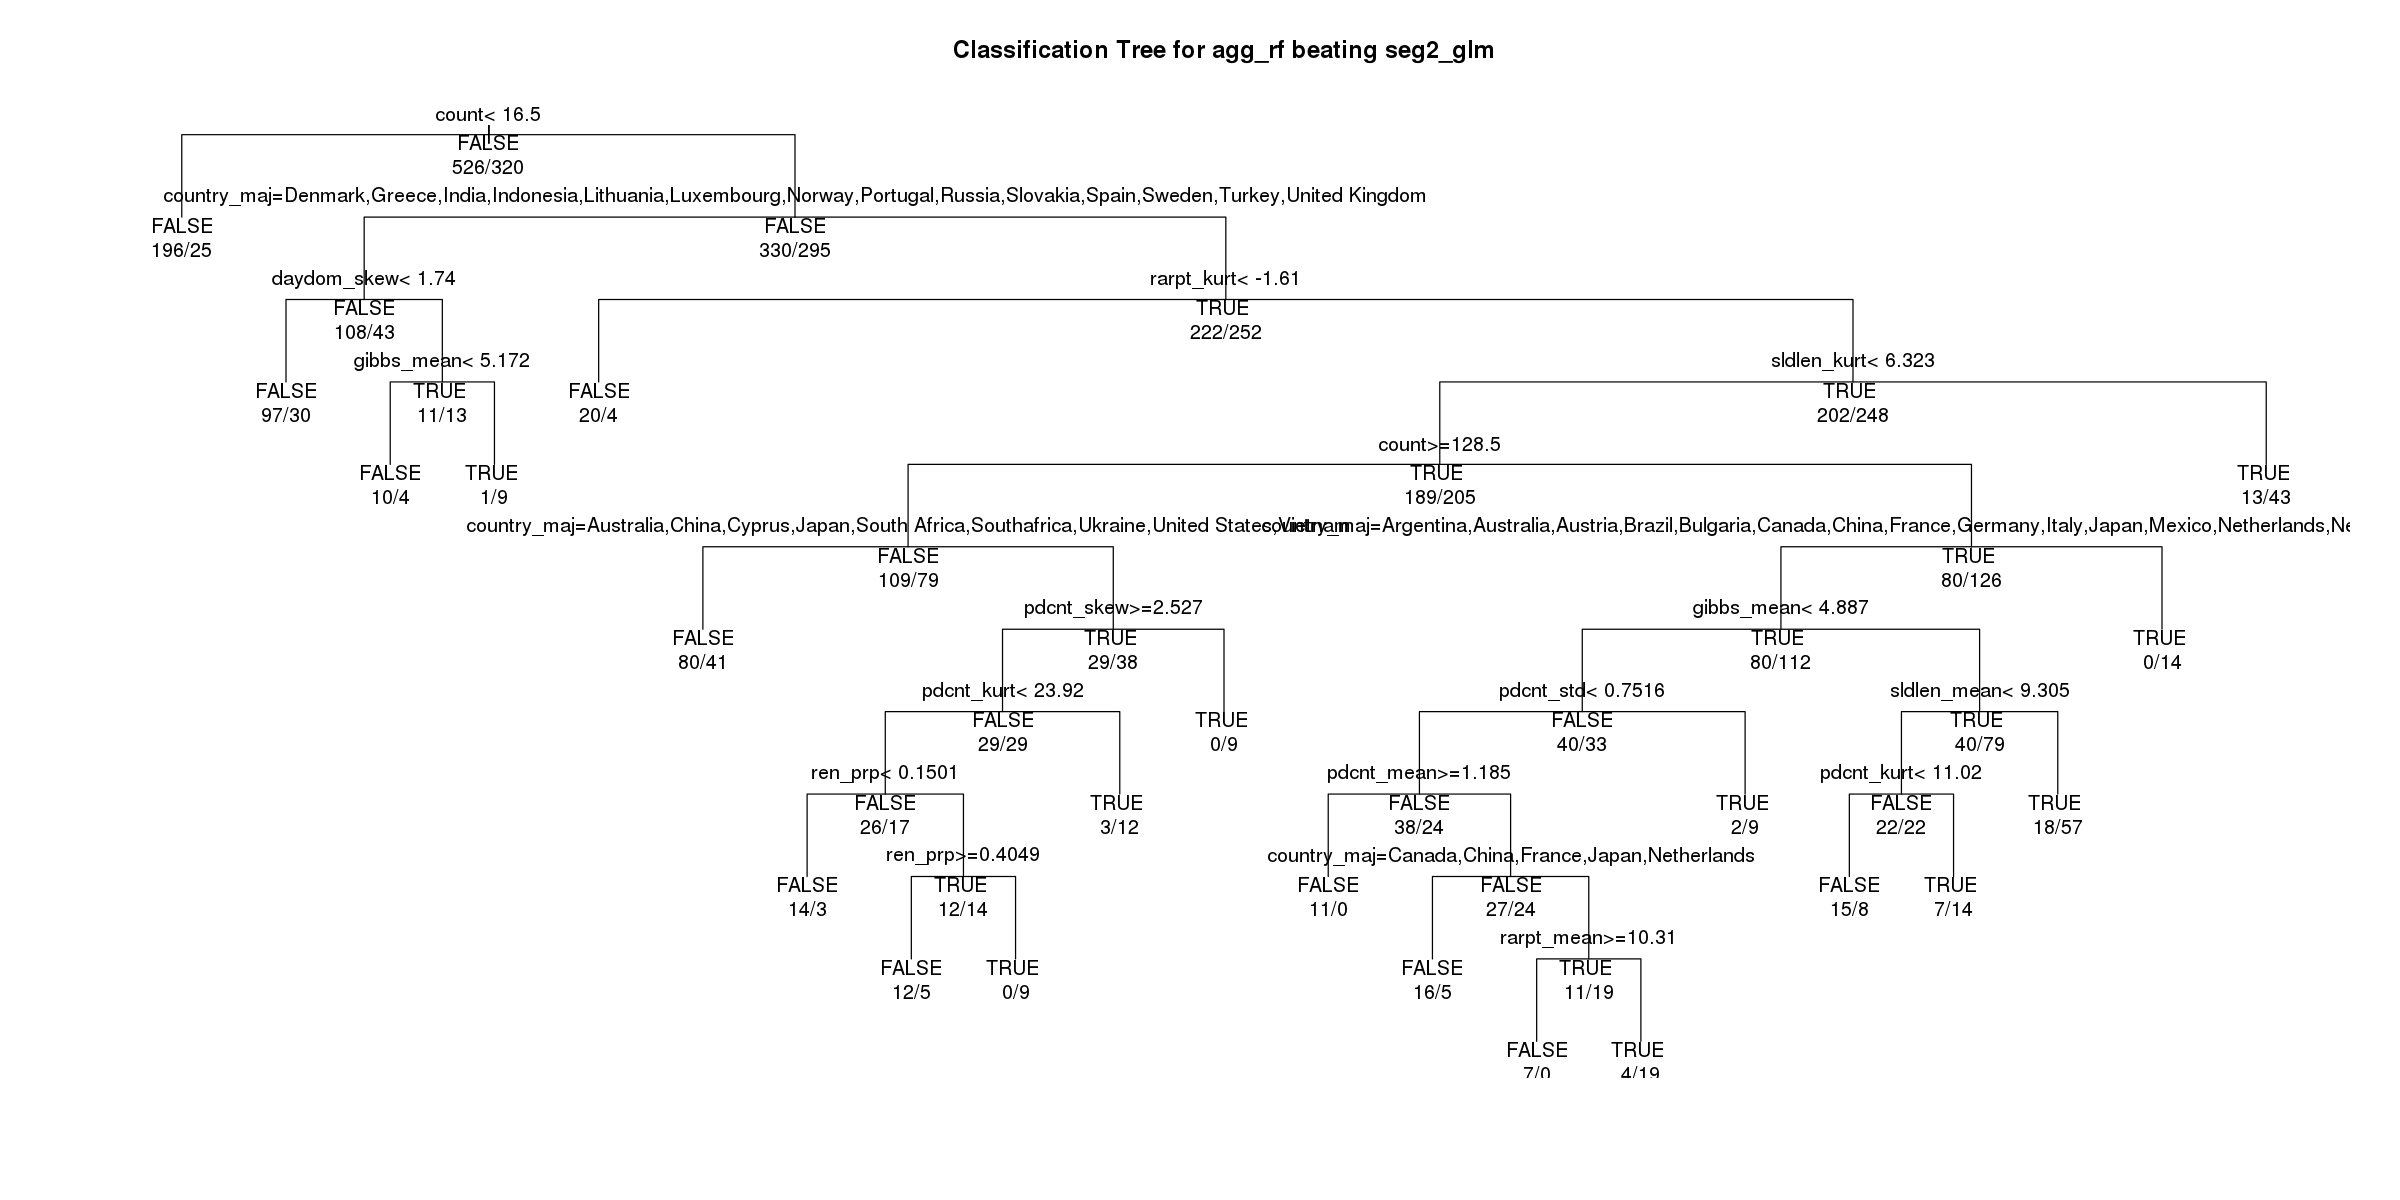

In [206]:
# plot tree
plot(fit, uniform=TRUE,
   main="Classification Tree for agg_rf beating seg2_glm", use.n=TRUE)
text(fit, use.n=TRUE, all=TRUE, cex=1, pretty=1)

Interpretation:
- If count of domains is less than or equal to 16, then seg2_glm wins
- Otherwise, if county_maj is one of <s>Cyprus,</s> **Denmark**, Greece, India, **Indonesia**,Lithuania, Luxembourg, <s>Nigeria</s>, Norway, Portugal, Russia, Slovakia, Spain, Sweden, <s>Switzerland</s>, Turkey, <s>Ukraine,Vietnam</s>, **United Kindon** AND daydpom_skew is < <s>1.68</s> 1.74, then seg2_glm wins... IF  daydpom_skew is >= <s>1.68</s> 1.74 but gibbs_mean < 5.172 then seg2_glm wins

In [207]:
library(rpart.plot)

Warning message:
“Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


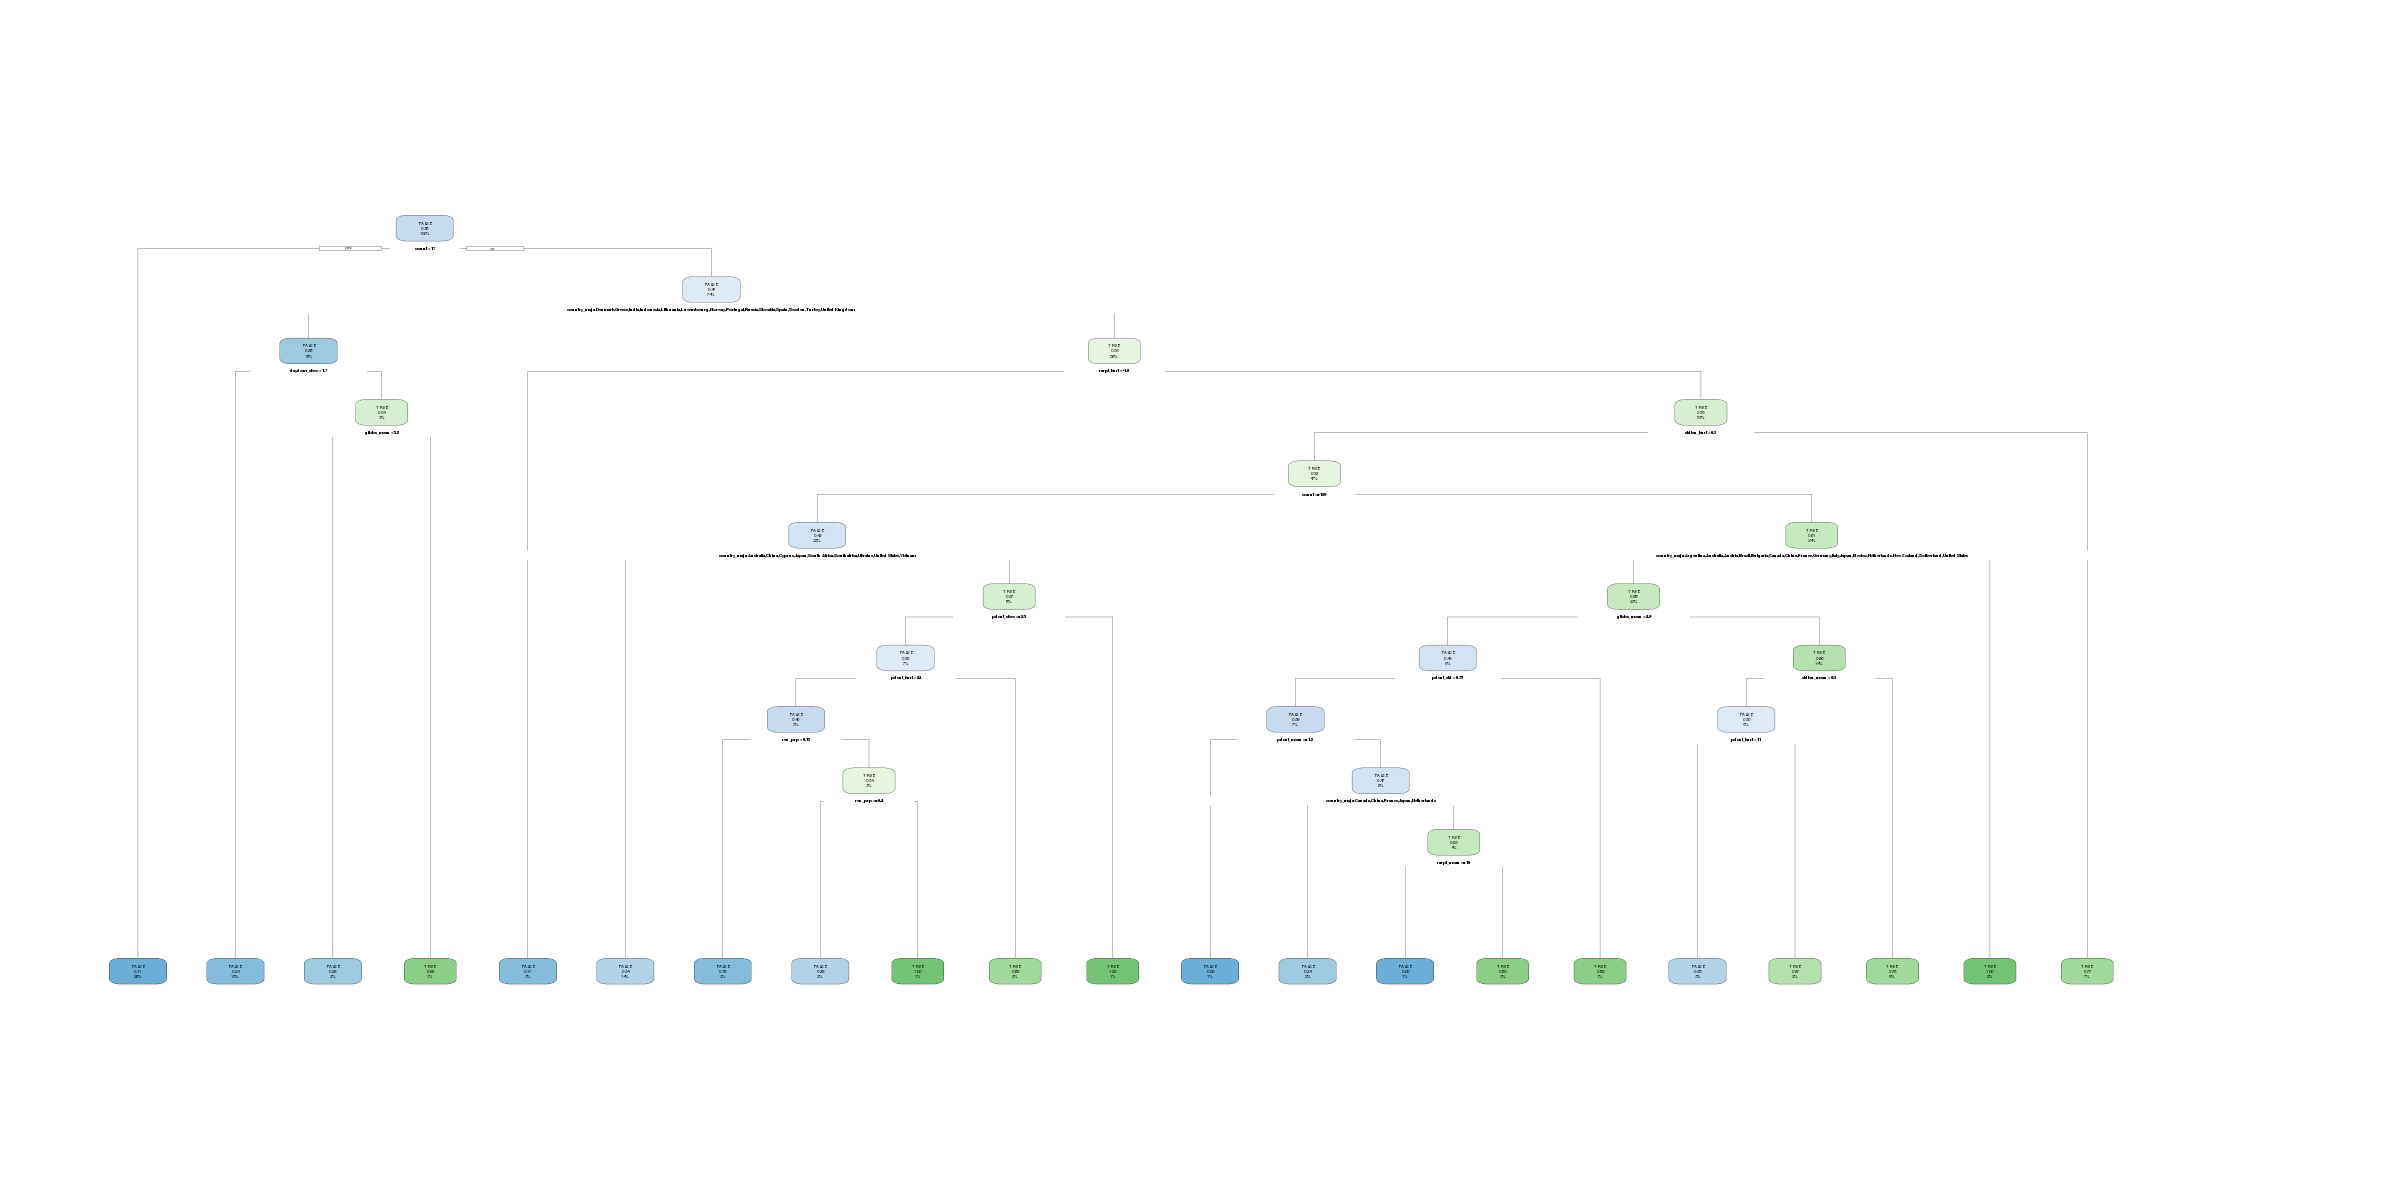

In [209]:
options(repr.plot.width=20, repr.plot.height=10)
rpart.plot(fit)

In [210]:
fit$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.04687500,0,1.000000,1.000000,0.04407910
2,0.02812500,5,0.762500,1.015625,0.04421050
3,0.01458333,6,0.734375,0.984375,0.04394074
4,0.01406250,9,0.690625,0.975000,0.04385436
5,0.01250000,13,0.634375,0.981250,0.04391223
6,0.01093750,18,0.562500,0.975000,0.04385436
7,0.01000000,20,0.540625,0.975000,0.04385436


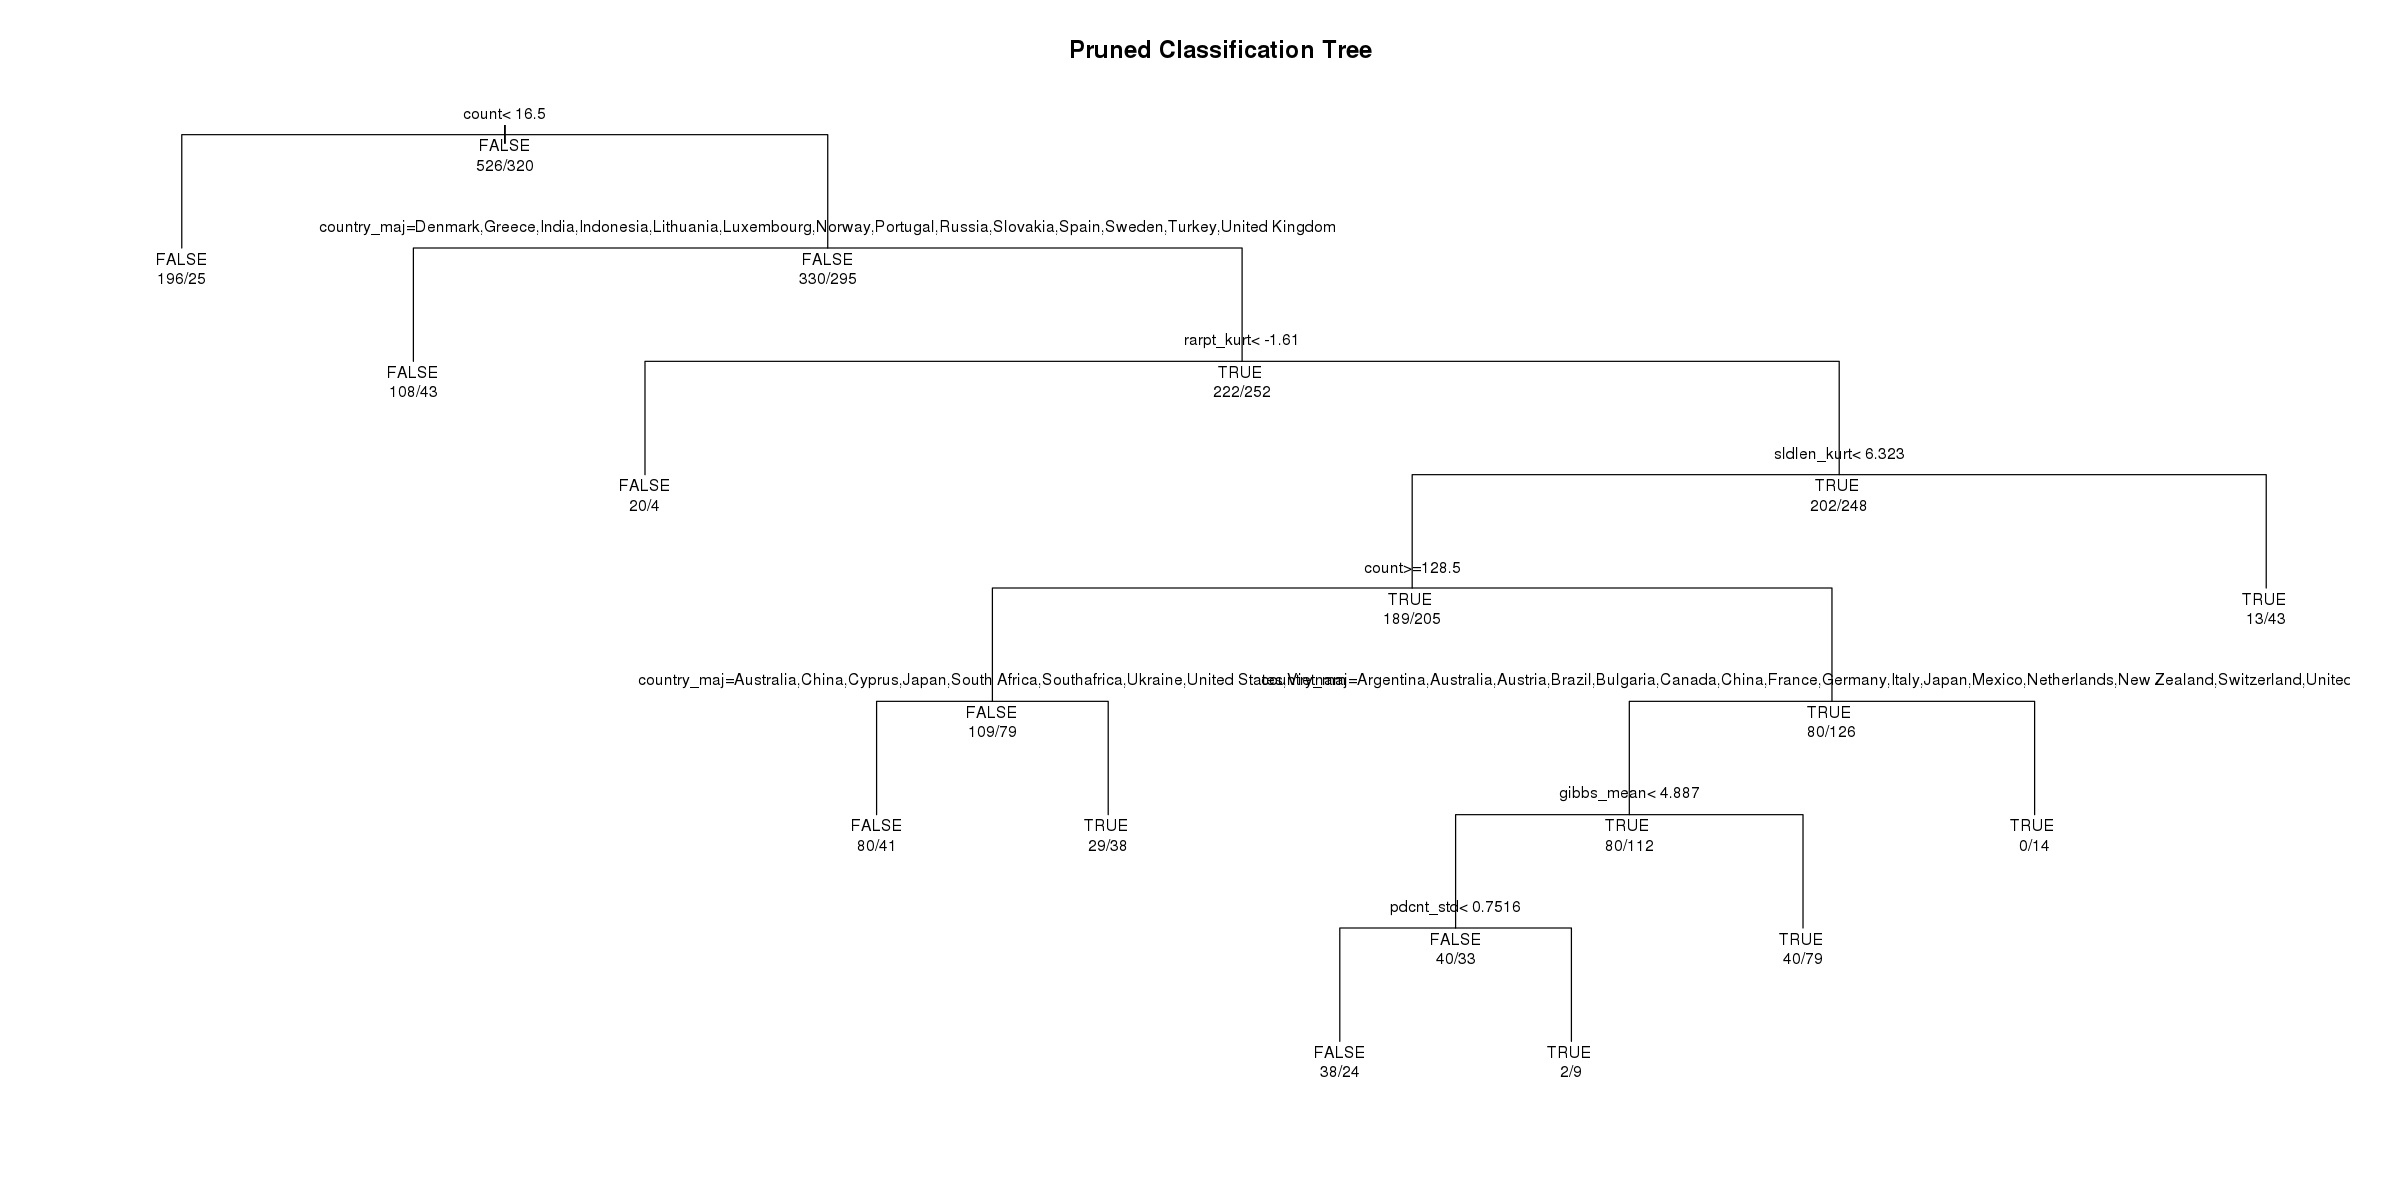

In [211]:
# prune the tree
pfit<- prune(fit, cp=   fit$cptable[which.min(fit$cptable[,"xerror"]),"CP"])
# pfit<- prune(fit, cp= .02)

# plot the pruned tree
plot(pfit, uniform=TRUE,
   main="Pruned Classification Tree ")
text(pfit, use.n=TRUE, all=TRUE, cex=.8, pretty=1)

In [228]:
summary(train$count)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00    15.25    72.50   956.02   316.75 72690.00 

In [220]:
t = factor(predict(fit,test,type="class"))

In [221]:
p = factor(test[['auc_win_glmagg_glmseg2_rfagg']])

In [222]:
length(t)
length(p)

[1] 212

[1] 0

In [224]:
test[['auc_win_segseg2']]

[1]  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13]  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
 [25] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [37]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
 [61]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
 [85] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
 [97] FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[109] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
[133] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
[145] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE
[157] FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE
[181] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [225]:
factor(predict(fit,test,type="class"))

1     3     7    12    14    15    22    27    28    32    35    43    47 
 TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE 
   60    62    63    66    70    73    75    86    97   101   102   109   118 
 TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE 
  126   131   132   133   140   144   147   149   150   154   156   157   174 
FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE 
  176   183   187   192   198   202   208   213   214   216   233   257   269 
FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE 
  272   273   276   283   285   288   290   293   300   305   307   313   314 
FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE 
  318   321   325   329   350   353   354   355   360   363   366   370   380 
FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  383   385   387   394   400   405   406   408   411   416   434   439   443 
 TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE 
  451   454   460   462   469   471   481   485   492   496   502   506   510 
FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE 
  514   518   525   529   531   540   550   551   556   561   565   568   571 
FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE 
  572   582   586   592   595   603   604   607   613   620   621   628   631 
FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE 
  632   634   636   641   642   645   647   652   659   661   670   676   681 
 TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE 
  689   691   701   705   707   708   715   729   731   746   758   768   773 
FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE 
  782   788   796   798   803   805   811   812   813   821   826   829   834 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  837   838   849   850   852   855   857   863   869   870   874   875   883 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  886   894   897   902   917   939   940   942   951   955   960   966   969 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  974   987   995  1001  1002  1003  1004  1009  1012  1016  1018  1019  1030 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
 1032  1035  1041  1049 
FALSE FALSE FALSE FALSE 
Levels: FALSE TRUE

In [226]:
# pruned test prediction
confusionMatrix(factor(test[['auc_win_segseg2']]),
                factor(predict(fit,test,type="class")))#, positive='1')

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   107   30
     TRUE     49   26
                                          
               Accuracy : 0.6274          
                 95% CI : (0.5585, 0.6926)
    No Information Rate : 0.7358          
    P-Value [Acc > NIR] : 0.99980         
                                          
                  Kappa : 0.1355          
                                          
 Mcnemar's Test P-Value : 0.04285         
                                          
            Sensitivity : 0.6859          
            Specificity : 0.4643          
         Pos Pred Value : 0.7810          
         Neg Pred Value : 0.3467          
             Prevalence : 0.7358          
         Detection Rate : 0.5047          
   Detection Prevalence : 0.6462          
      Balanced Accuracy : 0.5751          
                                          
       'Positive' Class : FALSE           
                     

In [227]:
# pruned test prediction
confusionMatrix(factor(test[['auc_win_aggseg2']]),
                factor(predict(pfit,test,type="class")))#, positive='1')

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   107   35
     TRUE     41   29
                                        
               Accuracy : 0.6415        
                 95% CI : (0.573, 0.706)
    No Information Rate : 0.6981        
    P-Value [Acc > NIR] : 0.9677        
                                        
                  Kappa : 0.1715        
                                        
 Mcnemar's Test P-Value : 0.5663        
                                        
            Sensitivity : 0.7230        
            Specificity : 0.4531        
         Pos Pred Value : 0.7535        
         Neg Pred Value : 0.4143        
             Prevalence : 0.6981        
         Detection Rate : 0.5047        
   Detection Prevalence : 0.6698        
      Balanced Accuracy : 0.5880        
                                        
       'Positive' Class : FALSE         
                                        